<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>To grant or not to grant:</center></div> <br>
<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Deciding on compensation benefits</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Machine Learning 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 50:</center></div>
   <div><center> Eldar Medvedev | r20181162 </center></div>
   <div><center> Jéssica Cristas | 20240488 </center></div>
   <div><center> Joshua Wehr | 20240501 </center></div>
   <div><center> Guilherme Godinho | 20211552 </center></div>
   <div><center> Umeima Adam | 20240543 </center></div>


<hr style="border: 5px solid #006064;border-radius: 5px;">

<div style= "font-size: 35px;font-weight:bold;"><center> Data Exploration & Preprocessing

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section 2; /* Start counting from 3 */            
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Index</b></h2>
<ol>
    <li><a href="#3">Data Preprocessing</a>
        <ol>
            <li><a href="#3.1">Missing values</a></li>
            <li><a href="#3.2">Duplicates and Dropping Columns</a></li>
            <li><a href="#3.3">Transforming Boolean Variables</a></li>
            <li><a href="#3.4">Dealing with IME-4 Count</a></li>
            <li><a href="#3.5">Dealing with Date Variables</a></li>
            <li><a href="#3.6">Dealing with Year</a></li>
            <li><a href="#3.7">Dealing with Age at Injury</a></li>
            <li><a href="#3.8">Dropping used Columns and Changing DataTypes</a></li>
            <li><a href="#3.9">Dealing with categorical data</a></li>
            <li><a href="#3.10">Dealing with Industry Code</a></li>
            <li><a href="#3.11">Dealing with WCIO Features</a></li>
            <li><a href="#3.12">Dealing with Missing values using KNNImputer</a></li>
            <li><a href="#3.13">Dealing With Average Weekly Wage</a></li>
        </ol>
    </li>
</ol>

<footer></footer>

</body>
</html>


## **Note:**


This notebook is **not intended to present our final preprocessing or modeling steps**. Instead, it aims to document our thought process and highlight the data exploration conducted throughout the project. Its primary purpose is to provide insight into the reasoning and experiments that informed our approach and how we decided to do Preprocessing steps. The application of the following Preprocessing functions will be done in the notebook "Exodia".

---

# <a class='anchor' id='3'></a>

> # **Data Preprocessing** 

Importing Required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [2]:
# Load data
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_22248\2908608565.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train_data.csv')


# <a class='anchor' id='3.1'></a>

> ## **Missing Values**

Here we are showing the missing values in the corresponding variables.

<Axes: >

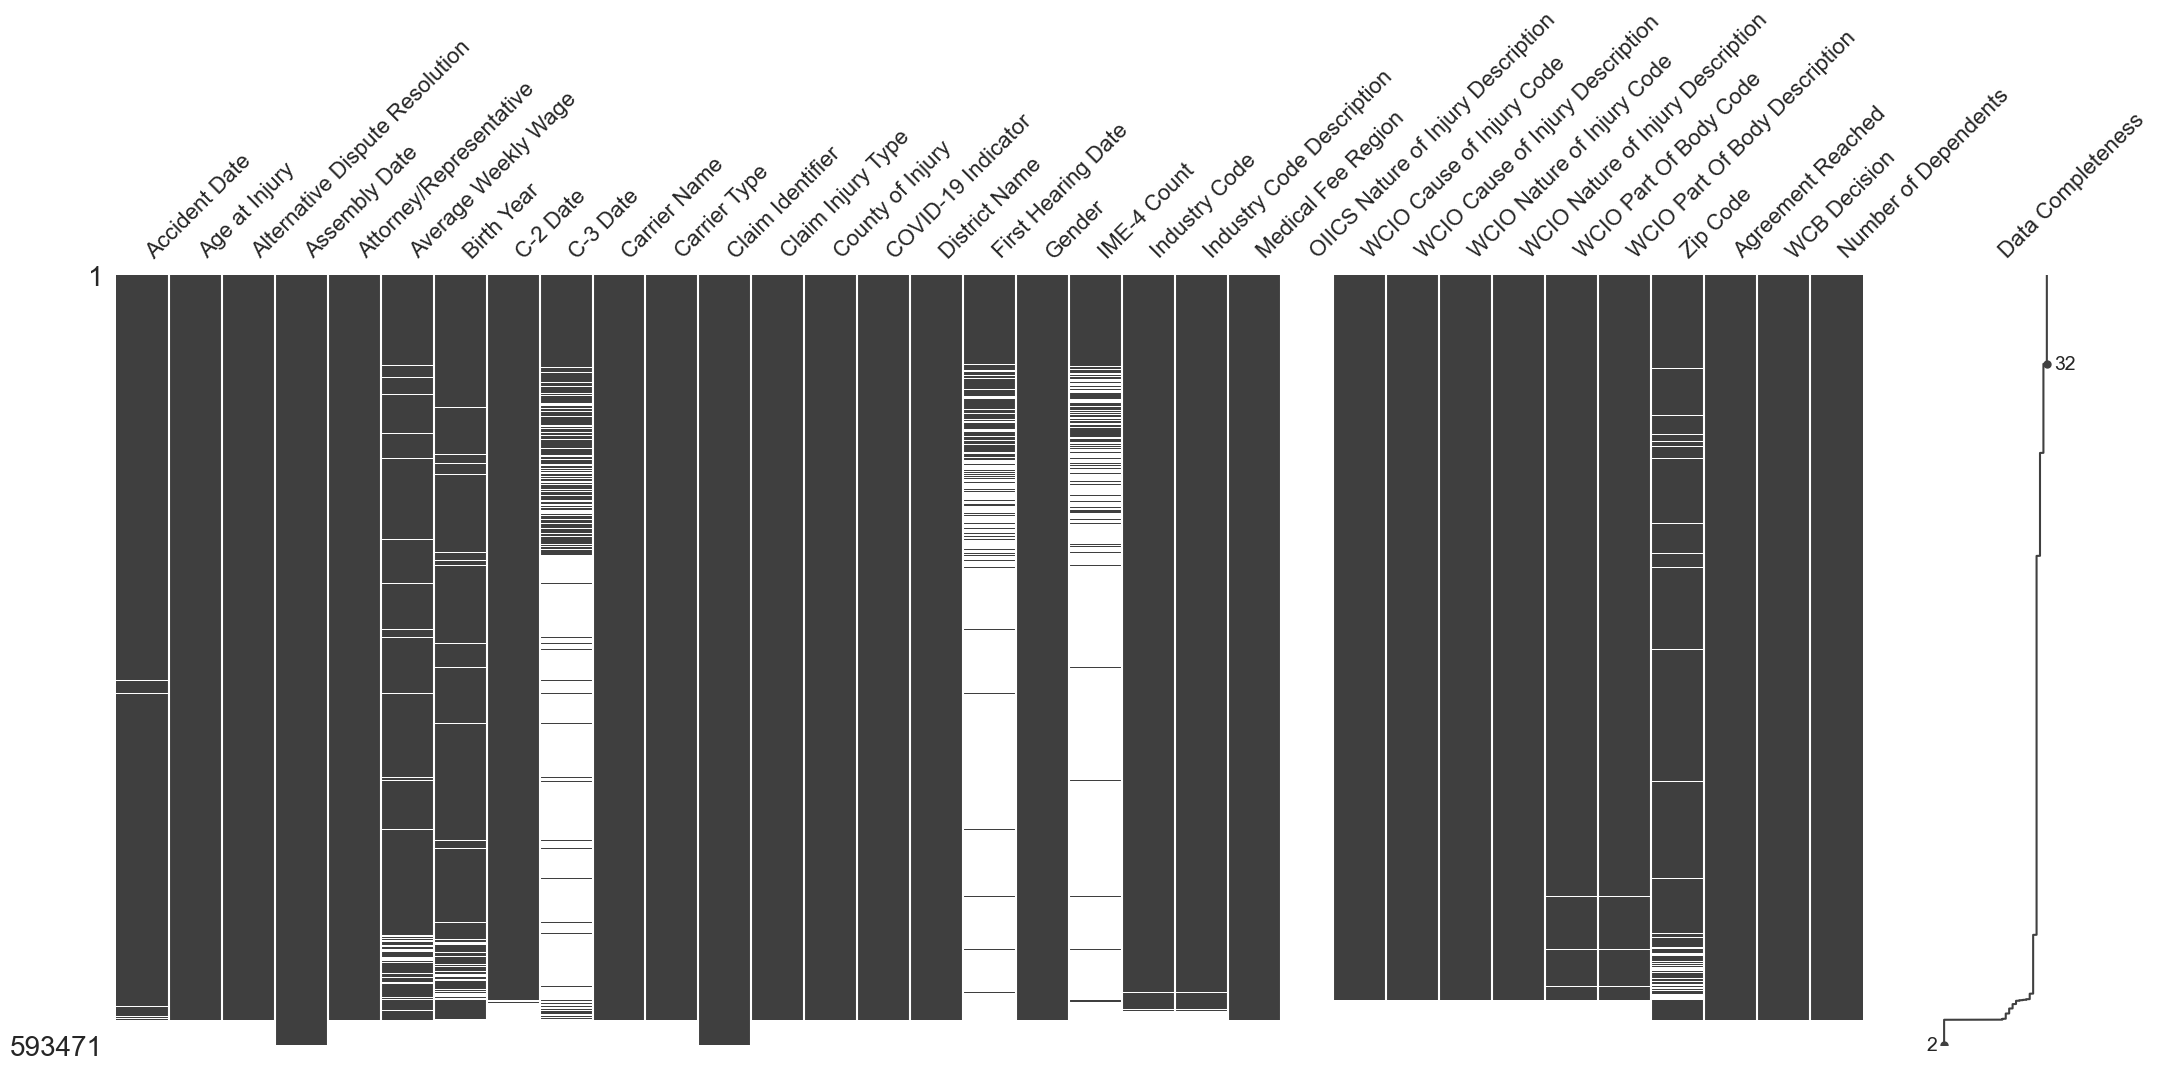

In [3]:
import missingno as msno

msno.matrix(train, labels=True, sort= 'descending')

A function that we are going to use in order to notice missing values and checking data types.

In [4]:
def show_missing(train):
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    for item in train.columns:
        variables.append(item)
        dtypes.append(train[item].dtype)
        count.append(len(train[item]))
        unique.append(len(train[item].unique()))
        missing.append(train[item].isna().sum())
        pc_missing.append(round((train[item].isna().sum() / len(train[item])*100)))
    output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
    'pc_missing': pc_missing
    })
    return output

This function will help us to compare the booleans to our target.

In [5]:
def compare_with_target(variable):
    # Group by the specified variable and 'Claim Injury Type', then count occurrences
    group_counts = train.groupby([variable, 'Claim Injury Type']).size().reset_index(name='Count')
    
    # Calculate total counts for each unique value of the specified variable
    total_counts = train.groupby(variable).size().reset_index(name='Total')
    
    # Merge total counts with group counts
    merged_counts = pd.merge(group_counts, total_counts, on=variable)
    
    # Calculate percentages
    merged_counts['Percentage'] = ((merged_counts['Count'] / merged_counts['Total']) * 100).round(2)
    
    # Drop the 'Total' column
    merged_counts = merged_counts.drop(columns=['Total'])
    
    return merged_counts


In [6]:
def number_bins_sturges(data):
    '''
    Calculates the number of bins based on the number of data points, using Sturges' rule
    Sturges' rule: k = log2(n) + 1

    Requires: The dataset for which the number of bins is to be calculated.
    Ensures: 
        - The returned value is a positive integer representing the number of bins.
        - The number of bins increases logarithmically as the dataset size increases.
    '''
    
    n = len(data)
    bins = np.ceil(np.log2(n) + 1) # np.log2 computes the base-2 logarithm of n, and np.ceil rounds the result up to the next whole number.
    return int(bins)

In [7]:
show_missing(train)

,variable,dtype,count,unique,missing,pc_missing
0,Accident Date,object,593471,5540,23134,4
1,Age at Injury,float64,593471,109,19445,3
2,Alternative Dispute Resolution,object,593471,4,19445,3
3,Assembly Date,object,593471,1096,0,0
4,Attorney/Representative,object,593471,3,19445,3
5,Average Weekly Wage,float64,593471,120025,48096,8
6,Birth Year,float64,593471,108,48523,8
7,C-2 Date,object,593471,2476,34005,6
8,C-3 Date,object,593471,1649,406226,68
9,Carrier Name,object,593471,2047,19445,3


We can see the pattern that there are 19445 missing values in most of the columns

We changed the position of `Claim Identifier` for the first Column.

In [8]:
train.insert(0, 'Claim Identifier', train.pop('Claim Identifier'))

# <a class='anchor' id='3.2'></a>

> ## **Duplicates and Dropping Columns**

Checking for duplicates.

In [9]:
train[train['Claim Identifier'].duplicated(keep=False)] # we will drop in the next step...

,Claim Identifier,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,292668076,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,292668076,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observing train dataset we can see that rows where id has length 9 are all nan.

In [10]:
filtered_df = train[train['Claim Identifier'].astype(str).str.len() == 9]
filtered_df

,Claim Identifier,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
3,957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593465,365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593466,327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593468,249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,120584215,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop these rows
train = train.drop(filtered_df.index)

In [12]:
train = train.drop('WCB Decision', axis = 1) # its or nan or 'Not Work Related'
train = train.drop('OIICS Nature of Injury Description', axis = 1) # all nan
test = test.drop('OIICS Nature of Injury Description', axis = 1) # all nan


In [13]:
train_id = pd.DataFrame(train['Claim Identifier'])
train = train.drop('Claim Identifier', axis = 1)

In [14]:
show_missing(train)

,variable,dtype,count,unique,missing,pc_missing
0,Accident Date,object,574026,5540,3689,1
1,Age at Injury,float64,574026,108,0,0
2,Alternative Dispute Resolution,object,574026,3,0,0
3,Assembly Date,object,574026,897,0,0
4,Attorney/Representative,object,574026,2,0,0
5,Average Weekly Wage,float64,574026,120025,28651,5
6,Birth Year,float64,574026,108,29078,5
7,C-2 Date,object,574026,2476,14560,3
8,C-3 Date,object,574026,1649,386781,67
9,Carrier Name,object,574026,2046,0,0


In [15]:
show_missing(test)

,variable,dtype,count,unique,missing,pc_missing
0,Accident Date,object,387975,3439,2444,1
1,Age at Injury,int64,387975,102,0,0
2,Alternative Dispute Resolution,object,387975,3,0,0
3,Assembly Date,object,387975,434,0,0
4,Attorney/Representative,object,387975,2,0,0
5,Average Weekly Wage,float64,387975,39009,19204,5
6,Birth Year,float64,387975,103,19470,5
7,C-2 Date,object,387975,1049,9134,2
8,C-3 Date,object,387975,627,302759,78
9,Carrier Name,object,387975,1598,0,0


In [16]:
train['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [17]:
train['Claim Injury Type'].value_counts(normalize=True)

Claim Injury Type
2. NON-COMP        0.507082
4. TEMPORARY       0.258711
3. MED ONLY        0.120040
5. PPD SCH LOSS    0.084108
1. CANCELLED       0.021736
6. PPD NSL         0.007336
8. DEATH           0.000819
7. PTD             0.000169
Name: proportion, dtype: float64

In [18]:
mapping = {
    '2. NON-COMP': 1,
    '4. TEMPORARY': 3,
    '3. MED ONLY': 2,
    '5. PPD SCH LOSS': 4,
    '1. CANCELLED': 0,
    '6. PPD NSL': 5,
    '8. DEATH': 7,
    '7. PTD': 6 }

def toggle_mapping(data, mapping = mapping):
    """
    Toggles between applying a mapping or its reverse to a pandas Series.
    
    Parameters:
    - data: pd.Series - The input pandas Series to be mapped.
    - mapping: dict - Dictionary defining the mapping. Default is a predefined mapping.

    Returns:
    - data: pd.Series - The Series with the mapping (or reverse mapping) applied.
    """ 
    
    # Get the first value of the Series to determine if it's already mapped
    sample_value = data.iloc[0]

    # Check if the first value is in the mapping keys
    if sample_value in mapping:
        # Apply the direct mapping to the entire Series
        data = data.replace(mapping)

    else:
        # Create a reverse mapping: values become keys, keys become values
        reverse_mapping = {v: k for k, v in mapping.items()}
        # Apply the reverse mapping to the entire Series
        data = data.replace(reverse_mapping)

    return data
train['Claim Injury Type'] = toggle_mapping(train['Claim Injury Type'])

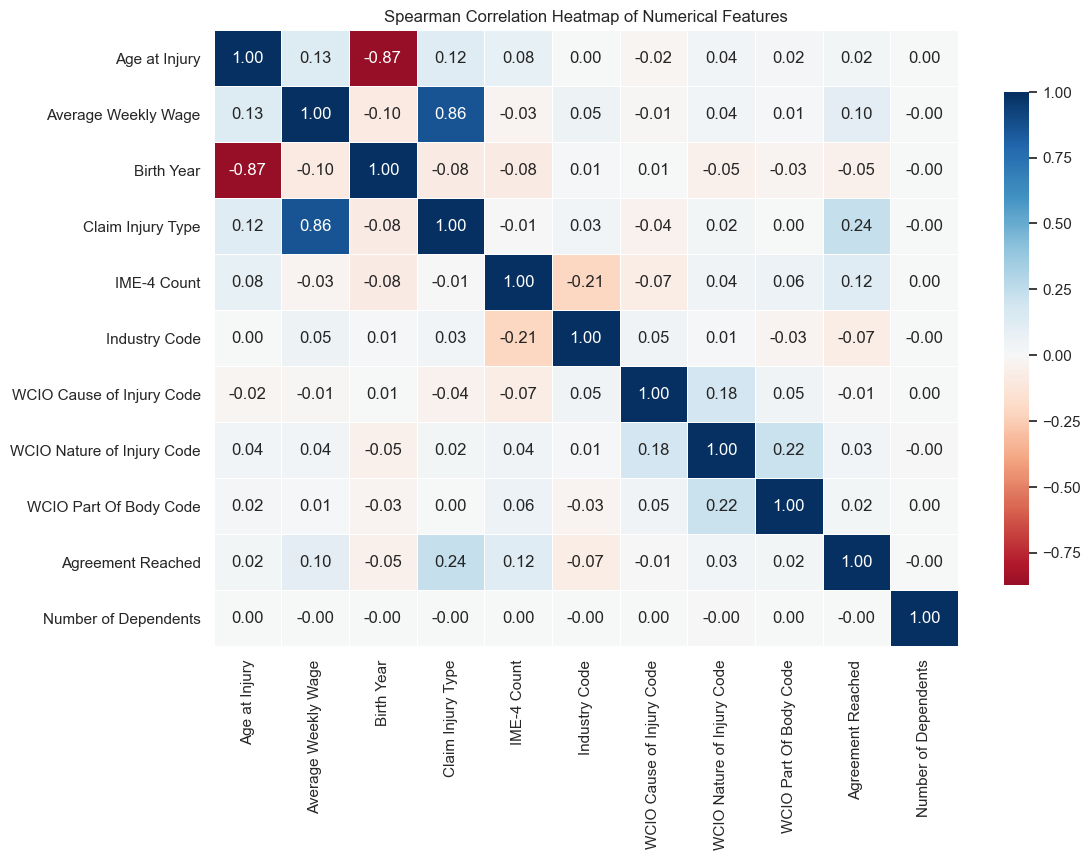

In [19]:
# Filter numerical features
numerical_features = train.select_dtypes(include=['number'])

# Compute Spearman correlation matrix
correlation_matrix = numerical_features.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdBu',  # Diverging colormap
    center=0,     # Center at 0 for white
    fmt=".2f",    # Format for annotation
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},  # Shrink the colorbar
)

plt.title("Spearman Correlation Heatmap of Numerical Features")
plt.show()


# <a class='anchor' id='3.3'></a>

> ## **Transforming Boolean Variables**

In [20]:
train['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

Here we are just taking a look of some boolean variables.

> ### Attorney/Representative

In [21]:
train['Attorney/Representative'].value_counts(normalize=True)

Attorney/Representative
N    0.683403
Y    0.316597
Name: proportion, dtype: float64

> ### COVID-19 Indicator

In [22]:
train['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    546505
Y     27521
Name: count, dtype: int64

The date _`March 1, 2020`_ appears more frequently than any other date. Upon reserarching about this date, we saw that it is the date that the first COVID-19 case appeared in NYC, (although it was only confirmed on the 2nd of March) as stated in a news website, Gothamist, (https://gothamist.com/news/remembering-march-2020-nyc-when-times-came-end). 

This was the start of many claims filled due to the impact of COVID-19 on the NY labour force and the many cases of infection, hospitalizations, and consequential deaths, that followed the pandemic. Although this is not an overwhelming reality for this dataset, as stated by the co-authors of New York Workers' Compensation Handbook, "Because COVID-19 has broadly affected communities and not just workplaces, employers and carriers are controverting many COVID-19 claims." 

(for more info: https://www.lexisnexis.com/community/insights/legal/workers-compensation/b/recent-cases-news-trends-developments/posts/new-york-workers-compensation-2020-the-year-in-review?srsltid=AfmBOorqf3xat_hPW4DQJ96IwN0FFjj0xtIFC_klRneYW_EoUH0wrPLc)

Since the day with the most records for `Accident Date` is _`March 1, 2020`_ — the date of the first COVID case in New York — let's see if the claims on that day might be related to the `COVID-19 Indicator` feature.

In [23]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [24]:
from tabulate import tabulate
# Filter train_data for records with Accident Date as '2020-03-01'
top_day = train[train['Accident Date'].isin(['2020-03-01'])]

# Create a Frequency table for the 'COVID-19 Indicator' on '2020-03-01'
COVID_day_counts = top_day['COVID-19 Indicator'].value_counts() 

total_count = COVID_day_counts.sum()

COVID_day_table = [[value, count, f"{(count / total_count) * 100:.2f}%"] for value, count in COVID_day_counts.items()]

print(tabulate(COVID_day_table, headers=['COVID-19 Indicator on March 1, 2020', "Count", "Percentage"], tablefmt="fancy_grid" ))



╒═══════════════════════════════════════╤═════════╤══════════════╕
│ COVID-19 Indicator on March 1, 2020   │   Count │ Percentage   │
╞═══════════════════════════════════════╪═════════╪══════════════╡
│ Y                                     │     912 │ 73.25%       │
├───────────────────────────────────────┼─────────┼──────────────┤
│ N                                     │     333 │ 26.75%       │
╘═══════════════════════════════════════╧═════════╧══════════════╛


> ### Alternative Dispute Resolution

In [25]:
train['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

> ### Gender

In [26]:
train['Gender'].value_counts()

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

Here we transform some variables into the boolean type. We decided to convert X , U for the `Gender` into males since it's the majority class (ZeroR). For the `Alternative Dispute Resolution` the unknown will be 0 (also ZeroR).

In [27]:
train['Attorney/Representative'] = (train['Attorney/Representative'] == 'Y').astype(int)

train['COVID-19 Indicator'] = (train['COVID-19 Indicator'] == 'Y').astype(int)

train['Alternative Dispute Resolution'] = train['Alternative Dispute Resolution'].map({'Y': 1, 'N': 0, 'U': 0})

train['Gender'] = train['Gender'].apply(lambda x: 0 if x == 'F' else 1) 


> Transforming all date variables to datetime format.

In [28]:
train['C-2 Date'] = pd.to_datetime(train['C-2 Date'])
train['Accident Date'] = pd.to_datetime(train['Accident Date'])
train['C-3 Date'] = pd.to_datetime(train['C-3 Date'])
train['Assembly Date'] = pd.to_datetime(train['Assembly Date'])
train['First Hearing Date'] = pd.to_datetime(train['First Hearing Date'])

# <a class='anchor' id='3.4'></a>

> ## **Dealing with IME-4 Count**

In [29]:
train['IME-4 Count'].value_counts(dropna=False)

IME-4 Count
NaN     441223
1.0      40112
2.0      34504
3.0      16136
4.0      13781
5.0       7680
6.0       6427
7.0       3838
8.0       3156
9.0       1915
10.0      1460
11.0      1002
12.0       807
13.0       516
14.0       396
15.0       273
16.0       214
18.0       140
17.0       125
19.0        79
20.0        56
21.0        53
22.0        34
23.0        19
24.0        16
27.0        14
26.0         8
25.0         7
29.0         5
28.0         4
30.0         4
32.0         4
34.0         4
36.0         3
33.0         2
31.0         2
39.0         2
37.0         1
48.0         1
35.0         1
47.0         1
73.0         1
Name: count, dtype: int64

78% is nan in IME-4 Count, we decided to flag it with a boolean column.

In [30]:
train['Missing IME-4 Count'] = train['IME-4 Count'].isnull().astype(int)

Number of IME-4 forms received per claim. So if it is nan it means that it is 0

In [31]:
train['IME-4 Count'] = train['IME-4 Count'].fillna(0)

From the histogram below we can clearly see some outliers. We decided to include them because we believe that they provide important information and we have a red-flag column if anything goes wrong.

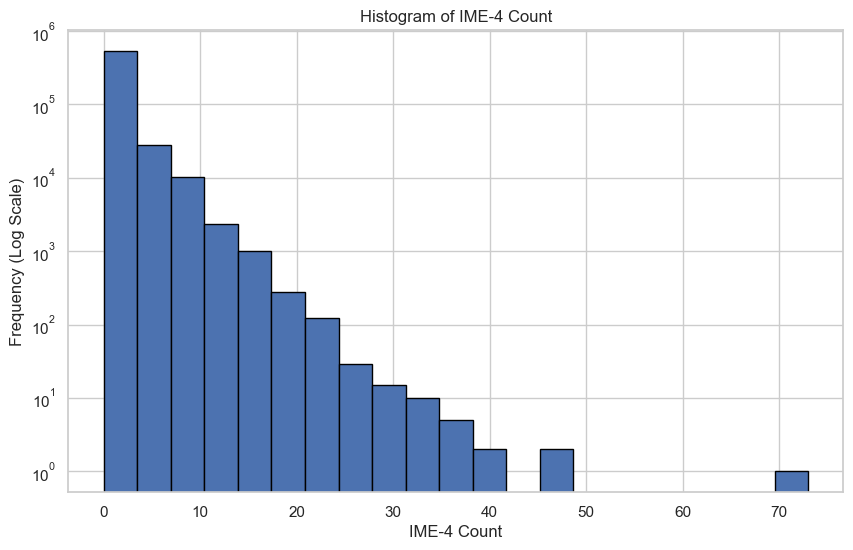

In [32]:
# Log-scaled histogram
plt.figure(figsize=(10, 6))
train['IME-4 Count'].plot(kind='hist', bins=number_bins_sturges(train['IME-4 Count']), edgecolor='black')
plt.yscale('log')  # log scale for y for better view
plt.title('Histogram of IME-4 Count')
plt.xlabel('IME-4 Count')
plt.ylabel('Frequency (Log Scale)') 
plt.show()

# <a class='anchor' id='3.5'></a>

> ## **Dealing with Date Variables**

Creating red flags if there was a date missing

In [33]:
train['Missing Accident'] = train['Accident Date'].isnull().astype(int)
train['Missing C-2'] = train['C-2 Date'].isnull().astype(int)
train['Missing C-3'] = train['C-3 Date'].isnull().astype(int)
train['Missing First Hearing'] = train['First Hearing Date'].isnull().astype(int)

Age at injury depends on accident date. If accident date is missing than Age at Injury == 0.
<br>Birth year is 0 in some cases also. <br>
We will deal with that later

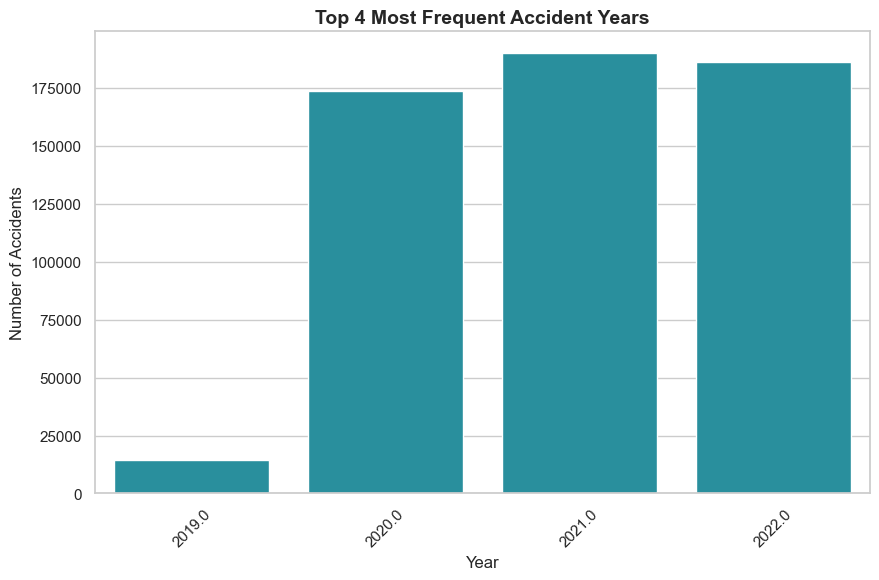

In [34]:

# Extract year from the 'Accident Date' column and get the most common years
train['Year'] = pd.DatetimeIndex(train['Accident Date']).year
top_years = train['Year'].value_counts().nlargest(4)  # Top 4 most frequent years

# Create the figure
plt.figure(figsize=(10, 6))
sns.barplot(x=top_years.index, y=top_years.values, color = '#169eb0')
plt.title('Top 4 Most Frequent Accident Years', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [35]:
train[train['Accident Date'].isna()].head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Missing IME-4 Count,Missing Accident,Missing C-2,Missing C-3,Missing First Hearing,Year
370,NaT,0.0,0,2020-01-02,1,0.0,1959.0,NaT,2019-12-23,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,1,BRONX,0,NYC,NaT,1,0.0,23.0,CONSTRUCTION,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,1,1,1,0,1,NaN
396,NaT,0.0,0,2020-01-02,1,0.0,1984.0,NaT,2019-12-27,LM INSURANCE CORP,1A. PRIVATE,1,ONONDAGA,0,SYRACUSE,NaT,0,0.0,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,4.0,1,1,1,0,1,NaN
486,NaT,0.0,0,2020-01-02,1,0.0,0.0,2021-03-26,2019-12-23,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,1,NEW YORK,0,NYC,2020-10-26,1,0.0,92.0,PUBLIC ADMINISTRATION,UK,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),34997,0.0,2.0,1,1,0,0,0,NaN
599,NaT,0.0,0,2020-01-02,1,0.0,1967.0,NaT,2019-12-27,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,0,ALBANY,0,ALBANY,NaT,1,0.0,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,12209,0.0,6.0,1,1,1,0,1,NaN
760,NaT,0.0,0,2020-01-03,1,0.0,1971.0,NaT,2019-12-23,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,0,KINGS,0,NYC,NaT,1,0.0,32.0,MANUFACTURING,IV,NaN,NaN,NaN,NaN,NaN,NaN,11231,0.0,1.0,1,1,1,0,1,NaN


#### Greenflag Dates

Creating greenflag column if our dates are in the good sequence

In [36]:
train['Greenflag Dates'] = (
    (train['Accident Date'] <= train['C-2 Date']) &
    (train['C-2 Date'] <= train['Assembly Date']) &
    (train['Assembly Date'] <= train['C-3 Date'])&
    (train['C-3 Date'] <= train['First Hearing Date'])
).astype(int)

So low because we have a lot of nan's in C-3 Date and First Hearing Date

In [37]:
train['Greenflag Dates'].value_counts()

Greenflag Dates
0    519653
1     54373
Name: count, dtype: int64

As u can see there is a clear difference in our target for a different values of GreenFlag Dates.

In [38]:
# Group by 'Greenflag Dates' and 'Claim Injury Type', and count occurrences

compare_with_target('Greenflag Dates')

,Greenflag Dates,Claim Injury Type,Count,Percentage
0,0,0,12273,2.36
1,0,1,288772,55.57
2,0,2,62591,12.04
3,0,3,115587,22.24
4,0,4,37676,7.25
5,0,5,2245,0.43
6,0,6,55,0.01
7,0,7,454,0.09
8,1,0,204,0.38
9,1,1,2306,4.24


#### Missing First Hearing

In [39]:
# Huge difference in almost every value
# Group by 'Missing First Hearing' and 'Claim Injury Type', and count occurrences
compare_with_target('Missing First Hearing')


,Missing First Hearing,Claim Injury Type,Count,Percentage
0,0,0,2195,1.46
1,0,1,14241,9.44
2,0,2,22219,14.73
3,0,3,76695,50.86
4,0,4,30706,20.36
5,0,5,4175,2.77
6,0,6,97,0.06
7,0,7,470,0.31
8,1,0,10282,2.43
9,1,1,276837,65.41


#### Dealing With missing values of C-2 Date and Accident Date

If the responsible does not report the accident to the insurance company, we assume that the employee had to contact WCB. We subtituted with the Assembly date, that is when WCB starts to examine the case. 

In [40]:
# Filling na with Assembly date. We have a red flag for it so it should be fine.
train['C-2 Date'] = train['C-2 Date'].fillna(train['Assembly Date'])

# Same process for the accident date.
train['Accident Date'] = train['Accident Date'].fillna(train['Assembly Date'])


## Creating Gaps | Analysing Dates | Dealing With Inconsistencies

Creating a variables counting how many days passed between 2 dates

In [41]:
train['C-2 To Assembly Days'] = (train['Assembly Date'] - train['C-2 Date']).dt.days
train['Accident To C-2 Days'] = (train['C-2 Date'] - train['Accident Date']).dt.days
train['Assembly To C-3 Days'] = (train['C-3 Date'] - train['Assembly Date']).dt.days
train['Accident To C-3 Days'] = (train['C-3 Date'] - train['Accident Date']).dt.days
train['Accident To Assembly Days'] = (train['Assembly Date'] - train['Accident Date']).dt.days

Create new columns 'Follow_The_C2/C3_Rules' based on the WCB rules (10 days for C-2, 2 years for C-3)

In [42]:
train['Follow_The_C2_Rules'] = train['Accident To C-2 Days'].apply(lambda x: 1 if ((x <= 10) & (x >= 0)) else 0)
train['Follow_The_C3_Rules'] = train['Accident To C-3 Days'].apply(lambda x: 1 if ((x <= 730) & (x >= 0)) else 0)

> ### C-3 Date

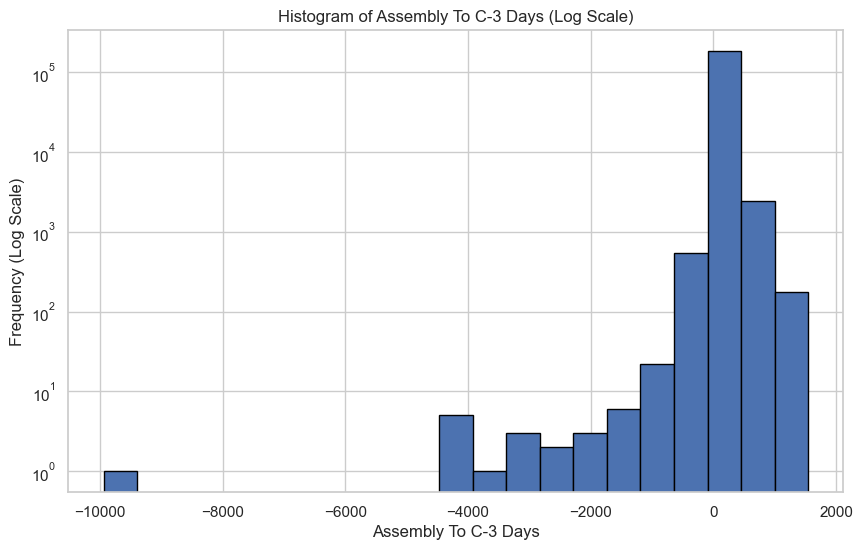

In [43]:
# A lot of negative C-3 days

plt.figure(figsize=(10, 6))
train['Assembly To C-3 Days'].plot(kind='hist', bins=number_bins_sturges(train['Assembly To C-3 Days']), edgecolor='black')
plt.yscale('log')  # log scale for y for better view
plt.title('Histogram of Assembly To C-3 Days (Log Scale)')
plt.xlabel('Assembly To C-3 Days')
plt.ylabel('Frequency (Log Scale)') 
plt.show()


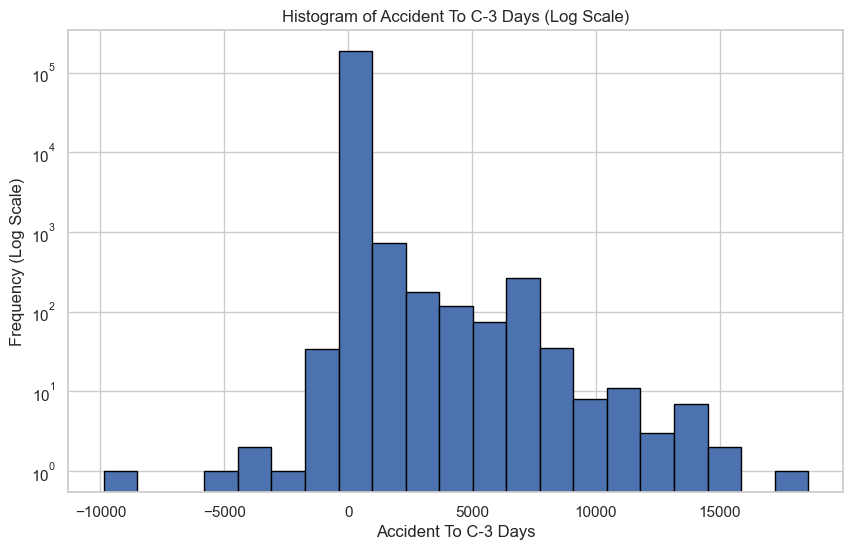

In [44]:
# A lot of negative C-3 days

plt.figure(figsize=(10, 6))
train['Accident To C-3 Days'].plot(kind='hist', bins=number_bins_sturges(train['Accident To C-3 Days']), edgecolor='black')
plt.yscale('log')  # log scale for y for better view
plt.title('Histogram of Accident To C-3 Days (Log Scale)')
plt.xlabel('Accident To C-3 Days')
plt.ylabel('Frequency (Log Scale)') 
plt.show()


Creating red flags for negative values in Assembly/Accident To C-3 Days 

In [45]:
train['RedFlag_Assembly_to_C-3'] = (train['Assembly To C-3 Days'] < 0).astype(int)
train['RedFlag_Accident_to_C-3'] = (train['Accident To C-3 Days'] < 0).astype(int)

RedFlag_Accident_to_C-3

In [46]:
# Group by 'RedFlag_Accident_to_C-3' and 'Claim Injury Type', and count occurrences

compare_with_target('RedFlag_Accident_to_C-3')

,RedFlag_Accident_to_C-3,Claim Injury Type,Count,Percentage
0,0,0,11435,2.01
1,0,1,289047,50.77
2,0,2,68464,12.03
3,0,3,148023,26.00
4,0,4,47580,8.36
5,0,5,4197,0.74
6,0,6,95,0.02
7,0,7,470,0.08
8,1,0,1042,22.10
9,1,1,2031,43.08


RedFlag_Assembly_to_C-3

In [47]:
# Group by 'RedFlag_Assembly_to_C-3' and 'Claim Injury Type', and count occurrences
compare_with_target('RedFlag_Assembly_to_C-3')

,RedFlag_Assembly_to_C-3,Claim Injury Type,Count,Percentage
0,0,0,7370,1.50
1,0,1,271601,55.44
2,0,2,58456,11.93
3,0,3,120524,24.60
4,0,4,28469,5.81
5,0,5,2938,0.60
6,0,6,68,0.01
7,0,7,457,0.09
8,1,0,5107,6.07
9,1,1,19477,23.15


> ### C-2 Date

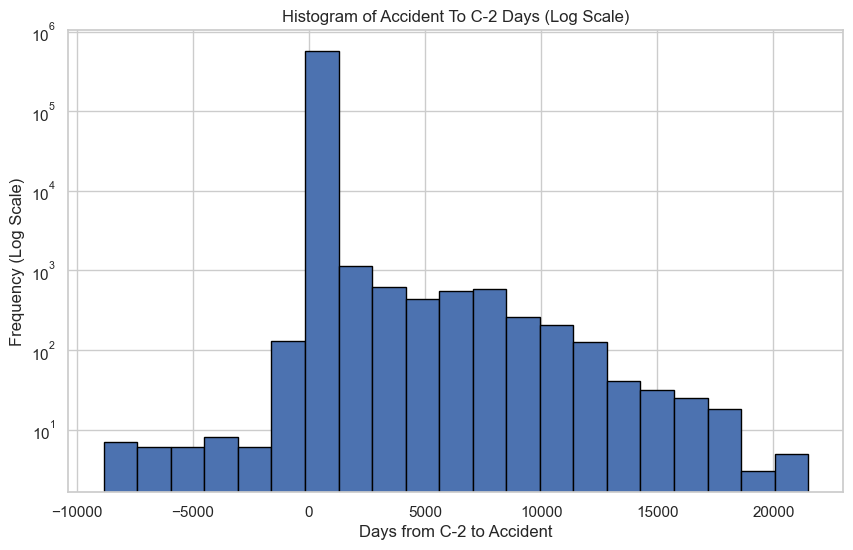

In [48]:
# We can see some negative values in a plot

plt.figure(figsize=(10, 6))
train['Accident To C-2 Days'].plot(kind='hist', bins=number_bins_sturges(train['Accident To C-2 Days']), edgecolor='black')
plt.yscale('log')  # log scale for y for better view
plt.title('Histogram of Accident To C-2 Days (Log Scale)')
plt.xlabel('Days from C-2 to Accident')
plt.ylabel('Frequency (Log Scale)')
plt.show()

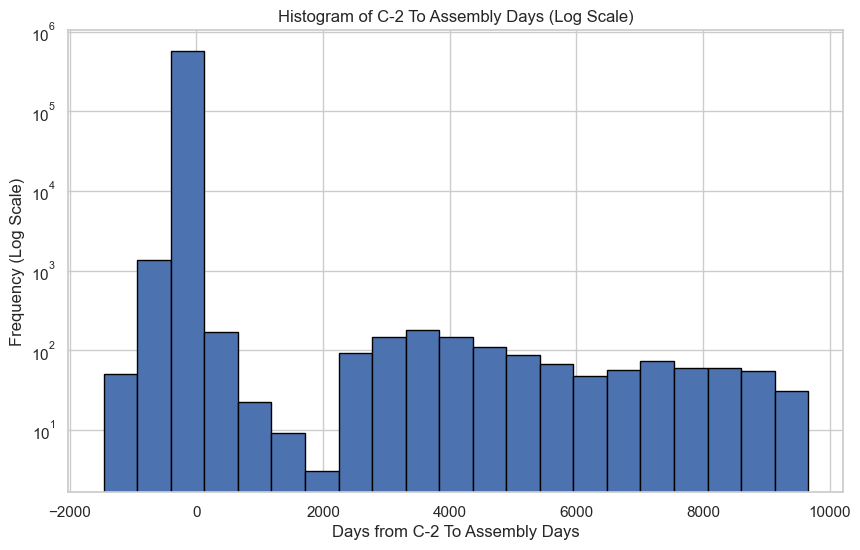

In [49]:
# We can see some negative values in a plot

plt.figure(figsize=(10, 6))
train['C-2 To Assembly Days'].plot(kind='hist', bins=number_bins_sturges(train['C-2 To Assembly Days']), edgecolor='black')
plt.yscale('log')  # log scale for y for better view
plt.title('Histogram of C-2 To Assembly Days (Log Scale)')
plt.xlabel('Days from C-2 To Assembly Days')
plt.ylabel('Frequency (Log Scale)')
plt.show()

In [50]:
# Creating red flags for negative values in Accident To C-2 Days

train['Red_Flag_Accident_To_C-2'] = (train['Accident To C-2 Days'] < 0).astype(int)

# Creating red flags for negative values in 'C-2 To Assembly Days'

train['Red_Flag_C-2_To_Assembly'] = (train['C-2 To Assembly Days'] < 0).astype(int)

Red_Flag_Accident_To_C-2

In [51]:
# Group by 'RedFlag_Accident_to_C-2' and 'Claim Injury Type', and count occurrences

compare_with_target('Red_Flag_Accident_To_C-2')

,Red_Flag_Accident_To_C-2,Claim Injury Type,Count,Percentage
0,0,0,12464,2.18
1,0,1,291010,50.79
2,0,2,68652,11.98
3,0,3,148243,25.87
4,0,4,47874,8.35
5,0,5,4199,0.73
6,0,6,94,0.02
7,0,7,469,0.08
8,1,0,13,1.27
9,1,1,68,6.66


Red_Flag_C-2_To_Assembly

In [52]:
# Group by 'Red_Flag_C-2_To_Assembly' and 'Claim Injury Type', and count occurrences

compare_with_target('Red_Flag_C-2_To_Assembly')

,Red_Flag_C-2_To_Assembly,Claim Injury Type,Count,Percentage
0,0,0,11023,2.18
1,0,1,275917,54.62
2,0,2,59173,11.71
3,0,3,124845,24.71
4,0,4,30780,6.09
5,0,5,3198,0.63
6,0,6,76,0.02
7,0,7,169,0.03
8,1,0,1454,2.11
9,1,1,15161,22.02


Here we decided to create boolean columns for all permutations between Accident, Assembly and C-2 Dates.

In [53]:
from itertools import permutations

def create_date_sequence_columns(data, date_columns):
    """
    Creates new columns to validate all permutations of a sequence of date columns.

    Parameters:
    - data: pd.DataFrame - The input DataFrame containing date columns.
    - date_columns: list - List of column names representing date columns.

    Returns:
    - data: pd.DataFrame - Updated DataFrame with new boolean columns for each date sequence.
    """   

    # Generate all permutations of the date columns
    sequences = list(permutations(date_columns))
    
    # Iterate over each permutation of the date columns
    for seq in sequences:
        col_name = ' - '.join(seq)  # Name for the new column
        data[col_name] = (data[seq[0]] <= data[seq[1]]) & (data[seq[1]] <= data[seq[2]])  # Check the correct order for the sequence
    
    return data

In [54]:
train = create_date_sequence_columns(train, ['Accident Date', 'Assembly Date', 'C-2 Date'])

Since we have extracted information from these three dates, we should also analyze the remaining ones. Here, we aim to understand the scenarios when one date is present while the other is missing, when both are present, and when neither is filled.

In [55]:
def dates_null_comparison(data, cols):
    """
    Creates binary indicator columns to check combinations of missing and non-missing values
    between two specified columns.

    Parameters:
    - data: pd.DataFrame - The input DataFrame where the checks will be applied.
    - cols: list - A list containing exactly two column names [col1, col2].

    Returns:
    - data: pd.DataFrame - Updated DataFrame with four new binary columns.
    """
    
    # Extract the two column names for readability
    col1 = cols[0]
    col2 = cols[1]
    
    # 1. Create a column indicating when col1 is NOT missing and col2 IS missing
    data[f'{col1}_Not_Missing_{col2}_Missing'] = (~data[col1].isna()) & (data[col2].isna())
    
    # 2. Create a column indicating when col1 IS missing and col2 is NOT missing
    data[f'{col2}_Not_Missing_{col1}_Missing'] = (data[col1].isna()) & (~data[col2].isna())
    
    # 3. Create a column indicating when both col1 and col2 are NOT missing
    data[f'{col1}_Not_Missing_{col2}_Not_Missing'] = (~data[col1].isna()) & (~data[col2].isna())
    
    # 4. Create a column indicating when both col1 and col2 ARE missing
    data[f'{col1}_Missing_{col2}_Missing'] = (data[col1].isna()) & (data[col2].isna())
    
    return data

In [56]:
train = dates_null_comparison(train, ['C-3 Date', 'First Hearing Date'])

In [57]:
show_missing(train)

,variable,dtype,count,unique,missing,pc_missing
0,Accident Date,datetime64[ns],574026,5539,0,0
1,Age at Injury,float64,574026,108,0,0
2,Alternative Dispute Resolution,int64,574026,2,0,0
3,Assembly Date,datetime64[ns],574026,897,0,0
4,Attorney/Representative,int32,574026,2,0,0
5,Average Weekly Wage,float64,574026,120025,28651,5
6,Birth Year,float64,574026,108,29078,5
7,C-2 Date,datetime64[ns],574026,2475,0,0
8,C-3 Date,datetime64[ns],574026,1649,386781,67
9,Carrier Name,object,574026,2046,0,0


In [58]:
compare_with_target('C-3 Date_Missing_First Hearing Date_Missing')

,C-3 Date_Missing_First Hearing Date_Missing,Claim Injury Type,Count,Percentage
0,False,0,6605,2.90
1,False,1,43741,19.17
2,False,2,31695,13.89
3,False,3,97712,42.83
4,False,4,43596,19.11
5,False,5,4199,1.84
6,False,6,97,0.04
7,False,7,470,0.21
8,True,0,5872,1.70
9,True,1,247337,71.50


In [59]:
compare_with_target('First Hearing Date_Not_Missing_C-3 Date_Missing')

,First Hearing Date_Not_Missing_C-3 Date_Missing,Claim Injury Type,Count,Percentage
0,False,0,11482,2.15
1,False,1,285464,53.54
2,False,2,61052,11.45
3,False,3,129769,24.34
4,False,4,41899,7.86
5,False,5,3364,0.63
6,False,6,79,0.01
7,False,7,47,0.01
8,True,0,995,2.43
9,True,1,5614,13.74


In [60]:
compare_with_target('C-3 Date_Not_Missing_First Hearing Date_Not_Missing')

,C-3 Date_Not_Missing_First Hearing Date_Not_Missing,Claim Injury Type,Count,Percentage
0,False,0,11277,2.43
1,False,1,282451,60.86
2,False,2,54541,11.75
3,False,3,90550,19.51
4,False,4,23955,5.16
5,False,5,883,0.19
6,False,6,18,0.00
7,False,7,423,0.09
8,True,0,1200,1.09
9,True,1,8627,7.85


In [61]:
compare_with_target('C-3 Date_Not_Missing_First Hearing Date_Missing')

,C-3 Date_Not_Missing_First Hearing Date_Missing,Claim Injury Type,Count,Percentage
0,False,0,8067,1.62
1,False,1,261578,52.66
2,False,2,59430,11.96
3,False,3,127490,25.67
4,False,4,35390,7.12
5,False,5,4187,0.84
6,False,6,97,0.02
7,False,7,470,0.09
8,True,0,4410,5.70
9,True,1,29500,38.15


There is a difference in every value of our new columns so they should be useful for our model.

> ### Mining info from Accident Date

Our model and feature selection algorithms will decide but we believe that `Accident Date` can influence on our target. So we mine some info from it.

In [62]:
train['Year'] = train['Accident Date'].dt.year
train['Month'] = train['Accident Date'].dt.month

# Check for weekends (Saturday=5, Sunday=6)
train['Is Weekend'] = train['Accident Date'].dt.dayofweek >= 5


In [63]:
# Create season column
train.loc[train['Month'].isin([ 1, 2, 12]), 'Month'] = 1 # Winter
train.loc[train['Month'].isin([3, 4, 5]), 'Month'] = 2 # Spring
train.loc[train['Month'].isin([6, 7, 8]), 'Month'] = 3 # Summer
train.loc[train['Month'].isin([9, 10, 11]), 'Month'] = 4 # Autumn

train = train.rename(columns={'Month': 'Season'})


In [64]:
train['Season'].value_counts()

Season
3    146773
1    146260
4    144244
2    136749
Name: count, dtype: int64

In [65]:
# Group by 'Is Weekend' and 'Claim Injury Type', and count occurrences

compare_with_target('Is Weekend')

,Is Weekend,Claim Injury Type,Count,Percentage
0,False,0,10783,2.22
1,False,1,246167,50.67
2,False,2,58495,12.04
3,False,3,125542,25.84
4,False,4,40832,8.40
5,False,5,3608,0.74
6,False,6,90,0.02
7,False,7,351,0.07
8,True,0,1694,1.92
9,True,1,44911,50.94


We don't see much difference but we will let our model to decide.

# <a class='anchor' id='3.6'></a>

> ## **Dealing with Year**

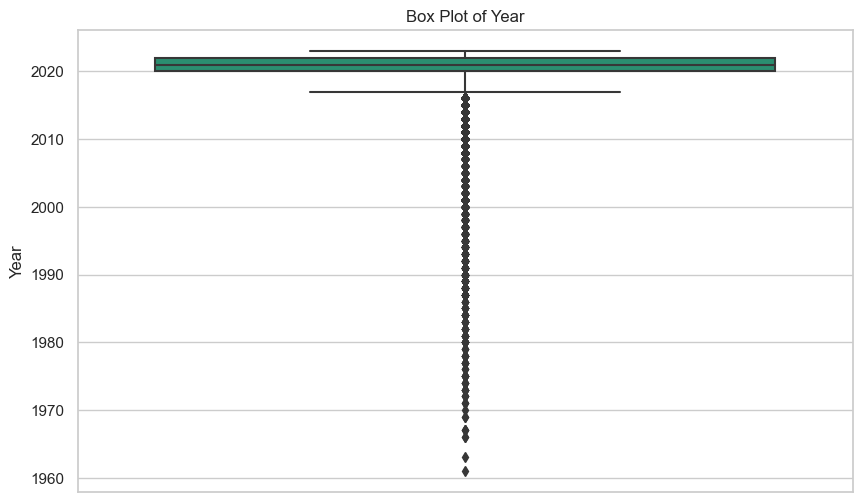

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, y='Year', palette='Dark2')
plt.title('Box Plot of Year')
plt.ylabel('Year')
plt.show()

Calculates q1, q3, iqr, and what limits. The values that are > upper_limit or < lower_limit are outliers

In [67]:
Q1 = train['Year'].quantile(0.25)
Q3 = train['Year'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [68]:
# We decided to create a red flag for the year
train['Red_Flag_Year'] = (train['Year'] < lower_limit).astype(int)

# <a class='anchor' id='3.7'></a>

> ## **Dealing with Age at Injury**

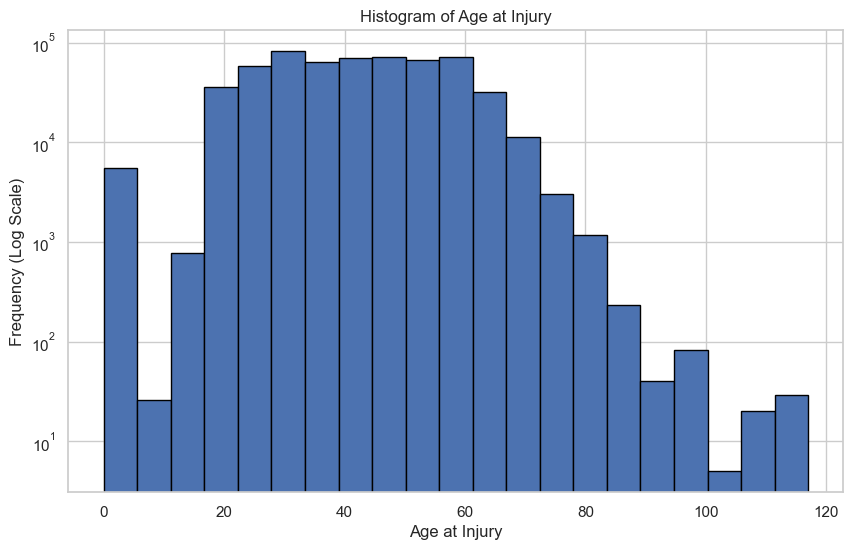

In [69]:
# Log-scaled histogram
plt.figure(figsize=(10, 6))
train['Age at Injury'].plot(kind='hist', bins=number_bins_sturges(train['Age at Injury']), edgecolor='black')
plt.yscale('log')  # log scale for y for better view
plt.title('Histogram of Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency (Log Scale)') 
plt.show()

From the figure above we can clearly see that there are outliers and errors(values = 0)

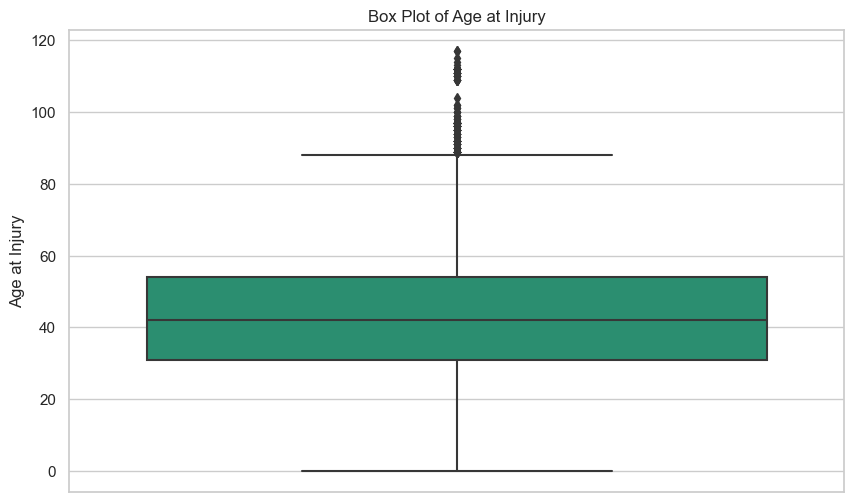

In [70]:
# In age we have not only missing values but also outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=train, y='Age at Injury', palette='Dark2')
plt.title('Box Plot of Age at Injury')
plt.ylabel('Age at Injury')
plt.show()

As was mentioned before if Accident date is missing then Age is 0. <br>
Now we have accident date because we filled with assembly date. but we still have a problem when Birth year is 0 or na.

In [71]:
train[train['Age at Injury'] == 0].head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Missing IME-4 Count,Missing Accident,Missing C-2,Missing C-3,Missing First Hearing,Year,Greenflag Dates,C-2 To Assembly Days,Accident To C-2 Days,Assembly To C-3 Days,Accident To C-3 Days,Accident To Assembly Days,Follow_The_C2_Rules,Follow_The_C3_Rules,RedFlag_Assembly_to_C-3,RedFlag_Accident_to_C-3,Red_Flag_Accident_To_C-2,Red_Flag_C-2_To_Assembly,Accident Date - Assembly Date - C-2 Date,Accident Date - C-2 Date - Assembly Date,Assembly Date - Accident Date - C-2 Date,Assembly Date - C-2 Date - Accident Date,C-2 Date - Accident Date - Assembly Date,C-2 Date - Assembly Date - Accident Date,C-3 Date_Not_Missing_First Hearing Date_Missing,First Hearing Date_Not_Missing_C-3 Date_Missing,C-3 Date_Not_Missing_First Hearing Date_Not_Missing,C-3 Date_Missing_First Hearing Date_Missing,Season,Is Weekend,Red_Flag_Year
262,2019-06-26,0.0,0,2020-01-02,0,0.0,0.0,2020-01-02,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,1,NASSAU,0,NYC,NaT,1,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,1.0,1,0,1,1,1,2019,0,0,190,NaN,NaN,190,0,0,0,0,0,0,True,True,False,False,False,False,False,False,False,True,3,False,0
358,2019-12-28,0.0,0,2020-01-02,0,0.0,0.0,2019-12-30,NaT,TWIN CITY FIRE INS CO.,1A. PRIVATE,1,NEW YORK,0,NYC,NaT,1,0.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,55.0,HOLDING OR CARRYING,52.0,STRAIN OR TEAR,61.0,ABDOMEN INCLUDING GROIN,NaN,0.0,5.0,1,0,0,1,1,2019,0,3,2,NaN,NaN,5,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,True,1,True,0
370,2020-01-02,0.0,0,2020-01-02,1,0.0,1959.0,2020-01-02,2019-12-23,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,1,BRONX,0,NYC,NaT,1,0.0,23.0,CONSTRUCTION,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,1,1,1,0,1,2020,0,0,0,-10.0,-10.0,0,1,0,1,1,0,0,True,True,True,True,True,True,True,False,False,False,1,False,0
396,2020-01-02,0.0,0,2020-01-02,1,0.0,1984.0,2020-01-02,2019-12-27,LM INSURANCE CORP,1A. PRIVATE,1,ONONDAGA,0,SYRACUSE,NaT,0,0.0,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,4.0,1,1,1,0,1,2020,0,0,0,-6.0,-6.0,0,1,0,1,1,0,0,True,True,True,True,True,True,True,False,False,False,1,False,0
433,2019-12-20,0.0,0,2020-01-02,0,0.0,0.0,2019-12-30,NaT,CARMEL CENTRAL SCHOOL DISTRICT,3A. SELF PUBLIC,1,PUTNAM,0,ALBANY,NaT,0,0.0,NaN,NaN,III,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,35.0,HAND,10512,0.0,0.0,1,0,0,1,1,2019,0,3,10,NaN,NaN,13,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,True,1,False,0


In [72]:
train[(train['Birth Year']== 0) & (train['Age at Injury'] == 0)].head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Missing IME-4 Count,Missing Accident,Missing C-2,Missing C-3,Missing First Hearing,Year,Greenflag Dates,C-2 To Assembly Days,Accident To C-2 Days,Assembly To C-3 Days,Accident To C-3 Days,Accident To Assembly Days,Follow_The_C2_Rules,Follow_The_C3_Rules,RedFlag_Assembly_to_C-3,RedFlag_Accident_to_C-3,Red_Flag_Accident_To_C-2,Red_Flag_C-2_To_Assembly,Accident Date - Assembly Date - C-2 Date,Accident Date - C-2 Date - Assembly Date,Assembly Date - Accident Date - C-2 Date,Assembly Date - C-2 Date - Accident Date,C-2 Date - Accident Date - Assembly Date,C-2 Date - Assembly Date - Accident Date,C-3 Date_Not_Missing_First Hearing Date_Missing,First Hearing Date_Not_Missing_C-3 Date_Missing,C-3 Date_Not_Missing_First Hearing Date_Not_Missing,C-3 Date_Missing_First Hearing Date_Missing,Season,Is Weekend,Red_Flag_Year
262,2019-06-26,0.0,0,2020-01-02,0,0.0,0.0,2020-01-02,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,1,NASSAU,0,NYC,NaT,1,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,1.0,1,0,1,1,1,2019,0,0,190,NaN,NaN,190,0,0,0,0,0,0,True,True,False,False,False,False,False,False,False,True,3,False,0
358,2019-12-28,0.0,0,2020-01-02,0,0.0,0.0,2019-12-30,NaT,TWIN CITY FIRE INS CO.,1A. PRIVATE,1,NEW YORK,0,NYC,NaT,1,0.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,55.0,HOLDING OR CARRYING,52.0,STRAIN OR TEAR,61.0,ABDOMEN INCLUDING GROIN,NaN,0.0,5.0,1,0,0,1,1,2019,0,3,2,NaN,NaN,5,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,True,1,True,0
433,2019-12-20,0.0,0,2020-01-02,0,0.0,0.0,2019-12-30,NaT,CARMEL CENTRAL SCHOOL DISTRICT,3A. SELF PUBLIC,1,PUTNAM,0,ALBANY,NaT,0,0.0,NaN,NaN,III,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,35.0,HAND,10512,0.0,0.0,1,0,0,1,1,2019,0,3,10,NaN,NaN,13,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,True,1,False,0
486,2020-01-02,0.0,0,2020-01-02,1,0.0,0.0,2021-03-26,2019-12-23,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,1,NEW YORK,0,NYC,2020-10-26,1,0.0,92.0,PUBLIC ADMINISTRATION,UK,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),34997,0.0,2.0,1,1,0,0,0,2020,0,-449,449,-10.0,-10.0,0,0,0,1,1,0,1,True,False,True,False,False,False,False,False,True,False,1,False,0
1372,2019-12-20,0.0,0,2020-01-03,0,0.0,0.0,2019-12-30,NaT,BOCES DUTCHESS COUNTY,3A. SELF PUBLIC,1,DUTCHESS,0,ALBANY,NaT,0,0.0,NaN,NaN,II,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,53.0,KNEE,12601,0.0,2.0,1,0,0,1,1,2019,0,4,10,NaN,NaN,14,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,True,1,False,0


In [73]:
train[(train['Birth Year'].isna()) & (train['Age at Injury'] == 0)].head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Missing IME-4 Count,Missing Accident,Missing C-2,Missing C-3,Missing First Hearing,Year,Greenflag Dates,C-2 To Assembly Days,Accident To C-2 Days,Assembly To C-3 Days,Accident To C-3 Days,Accident To Assembly Days,Follow_The_C2_Rules,Follow_The_C3_Rules,RedFlag_Assembly_to_C-3,RedFlag_Accident_to_C-3,Red_Flag_Accident_To_C-2,Red_Flag_C-2_To_Assembly,Accident Date - Assembly Date - C-2 Date,Accident Date - C-2 Date - Assembly Date,Assembly Date - Accident Date - C-2 Date,Assembly Date - C-2 Date - Accident Date,C-2 Date - Accident Date - Assembly Date,C-2 Date - Assembly Date - Accident Date,C-3 Date_Not_Missing_First Hearing Date_Missing,First Hearing Date_Not_Missing_C-3 Date_Missing,C-3 Date_Not_Missing_First Hearing Date_Not_Missing,C-3 Date_Missing_First Hearing Date_Missing,Season,Is Weekend,Red_Flag_Year
2134,2020-01-06,0.0,0,2020-01-06,1,0.00,NaN,2020-03-09,2019-12-31,"MACY'S, INC.",4A. SELF PRIVATE,1,BRONX,0,NYC,2020-03-12,1,0.0,45.0,RETAIL TRADE,IV,98.0,"CUMULATIVE, NOC",52.0,STRAIN OR TEAR,22.0,DISC,10456,0.0,6.0,1,1,0,0,0,2020,0,-63,63,-6.0,-6.0,0,0,0,1,1,0,1,True,False,True,False,False,False,False,False,True,False,1,False,0
5146,2020-01-08,0.0,0,2020-01-10,1,628.62,NaN,2020-01-10,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,3,SUFFOLK,0,HAUPPAUGE,2020-11-13,1,2.0,31.0,MANUFACTURING,IV,70.0,"STRIKING AGAINST OR STEPPING ON, NOC",13.0,CRUSHING,NaN,NaN,11720,1.0,6.0,0,0,0,1,0,2020,0,0,2,NaN,NaN,2,1,0,0,0,0,0,True,True,False,False,False,False,False,True,False,False,1,False,0
5227,2020-01-10,0.0,0,2020-01-10,1,0.00,NaN,2020-02-19,2020-01-07,A I U INSURANCE COMPANY,1A. PRIVATE,1,QUEENS,0,NYC,2020-05-18,1,0.0,51.0,INFORMATION,IV,52.0,CONTINUAL NOISE,72.0,LOSS OF HEARING,13.0,EAR(S),11354,0.0,2.0,1,1,0,0,0,2020,0,-40,40,-3.0,-3.0,0,0,0,1,1,0,1,True,False,True,False,False,False,False,False,True,False,1,False,0
6167,2020-01-13,0.0,0,2020-01-13,1,0.00,NaN,2020-02-10,2020-01-07,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,1,KINGS,0,NYC,2020-05-15,0,2.0,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",42.0,LOWER BACK AREA,11214,0.0,1.0,0,1,0,0,0,2020,0,-28,28,-6.0,-6.0,0,0,0,1,1,0,1,True,False,True,False,False,False,False,False,True,False,1,False,0
6250,2020-01-13,0.0,0,2020-01-13,1,0.00,NaN,2021-04-13,2020-01-08,CHUBB INDEMNITY INS CO,1A. PRIVATE,1,SUFFOLK,0,HAUPPAUGE,2021-03-26,1,0.0,23.0,CONSTRUCTION,IV,98.0,"CUMULATIVE, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),11730,0.0,2.0,1,1,0,0,0,2020,0,-456,456,-5.0,-5.0,0,0,0,1,1,0,1,True,False,True,False,False,False,False,False,True,False,1,False,0


As we mentioned the problem is when birth year is na or 0, after filling it with 0, the problem is only when it is 0 :D

In [74]:
train['Birth Year'] = train['Birth Year'].fillna(0)


This identifies rows where both Birth Year and Age at Injury are 0 and then sets Age at Injury to NaN for those rows. <br>
We will input it with KNNImputer

In [75]:
train.loc[(train['Birth Year'] == 0) & (train['Age at Injury'] == 0), 'Age at Injury'] = np.nan


In [76]:
# calculates q1, q3, iqr, and what limits. The values that are > upper_limit or < lower_limit are outliers

Q1 = train['Age at Injury'].quantile(0.25)
Q3 = train['Age at Injury'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

Replace age at injury == 0 with Year(Accident Year) - Birth Year <br>
Now we can freely do it since we dealed(all nan) with situation when both are 0

In [77]:
train.loc[train['Age at Injury'] == 0, 'Age at Injury'] = (train['Year'] - train['Birth Year'])

In [78]:
train[train['Age at Injury'] > upper_limit]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents,Missing IME-4 Count,Missing Accident,Missing C-2,Missing C-3,Missing First Hearing,Year,Greenflag Dates,C-2 To Assembly Days,Accident To C-2 Days,Assembly To C-3 Days,Accident To C-3 Days,Accident To Assembly Days,Follow_The_C2_Rules,Follow_The_C3_Rules,RedFlag_Assembly_to_C-3,RedFlag_Accident_to_C-3,Red_Flag_Accident_To_C-2,Red_Flag_C-2_To_Assembly,Accident Date - Assembly Date - C-2 Date,Accident Date - C-2 Date - Assembly Date,Assembly Date - Accident Date - C-2 Date,Assembly Date - C-2 Date - Accident Date,C-2 Date - Accident Date - Assembly Date,C-2 Date - Assembly Date - Accident Date,C-3 Date_Not_Missing_First Hearing Date_Missing,First Hearing Date_Not_Missing_C-3 Date_Missing,C-3 Date_Not_Missing_First Hearing Date_Not_Missing,C-3 Date_Missing_First Hearing Date_Missing,Season,Is Weekend,Red_Flag_Year
902,2019-03-07,89.0,0,2020-01-03,0,0.00,1930.0,2020-01-03,NaT,MEMIC INDEMNITY COMPANY,1A. PRIVATE,1,ORANGE,0,ALBANY,NaT,1,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,III,81.0,"STRUCK OR INJURED, NOC",40.0,LACERATION,30.0,MULTIPLE UPPER EXTREMITIES,10950,0.0,6.0,1,0,0,1,1,2019,0,0,302,NaN,NaN,302,0,0,0,0,0,0,True,True,False,False,False,False,False,False,False,True,2,False,0
4054,2020-01-06,89.0,0,2020-01-08,1,201.73,1930.0,2020-01-08,NaT,UTICA NATIONAL ASSURANCE CO,1A. PRIVATE,4,WARREN,0,ALBANY,2021-06-02,0,5.0,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",I,33.0,ON STAIRS,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",31.0,UPPER ARM,12804,0.0,3.0,0,0,0,1,0,2020,0,0,2,NaN,NaN,2,1,0,0,0,0,0,True,True,False,False,False,False,False,True,False,False,1,False,0
4851,2019-08-11,118.0,0,2020-01-09,0,150.00,1901.0,2020-01-09,2019-12-27,WESCO INSURANCE COMPANY,1A. PRIVATE,2,KINGS,0,NYC,NaT,1,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11219,0.0,5.0,1,0,0,0,1,2019,0,0,151,-13.0,138.0,151,0,1,1,0,0,0,True,True,False,False,False,False,True,False,False,False,3,True,0
7655,2020-01-12,119.0,0,2020-01-14,0,528.71,1901.0,2020-01-14,NaT,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,3,ST. LAWRENCE,0,ALBANY,NaT,1,0.0,31.0,MANUFACTURING,I,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,35.0,HAND,13662,0.0,5.0,1,0,0,1,1,2020,0,0,2,NaN,NaN,2,1,0,0,0,0,0,True,True,False,False,False,False,False,False,False,True,1,True,0
9874,2020-01-06,119.0,0,2020-01-17,0,0.00,1901.0,2020-01-17,NaT,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,1,ERIE,0,BUFFALO,NaT,0,0.0,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",I,31.0,"FALL, SLIP OR TRIP, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",53.0,KNEE,14150,0.0,0.0,1,0,0,1,1,2020,0,0,11,NaN,NaN,11,0,0,0,0,0,0,True,True,False,False,False,False,False,False,False,True,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591462,2022-12-23,114.0,0,2022-12-28,0,0.00,1909.0,2022-12-28,NaT,EVEREST PREMIER INSURANCE,1A. PRIVATE,1,NEW YORK,0,NYC,NaT,1,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,53.0,TWISTING,52.0,STRAIN OR TEAR,55.0,ANKLE,10001,0.0,3.0,1,0,0,1,1,2022,0,0,5,NaN,NaN,5,1,0,0,0,0,0,True,True,False,False,False,False,False,False,False,True,1,False,0
592648,2019-09-06,109.0,0,2022-12-29,0,0.00,1910.0,2022-12-29,NaT,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE

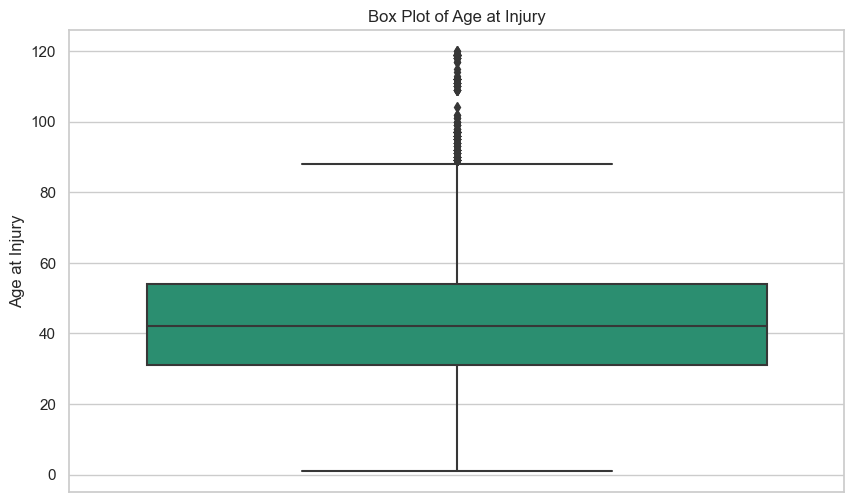

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, y='Age at Injury', palette='Dark2')
plt.title('Box Plot of Age at Injury')
plt.ylabel('Age at Injury')
plt.show()

We decided to use KNNImputer to input outliers since there are extremely high values of age.

In [80]:
train.loc[train['Age at Injury'] > upper_limit, 'Age at Injury'] = np.nan

In [81]:
# Creating red flags for values lower than 18 (but besides that we are not going to do anything with these values)

train['Red_Flag_Age at Injury'] = (train['Age at Injury'] < 18).astype(int)

In [82]:
# Group by 'Red_Flag_Age at Injury' and 'Claim Injury Type', and count occurrences

compare_with_target('Red_Flag_Age at Injury')

,Red_Flag_Age at Injury,Claim Injury Type,Count,Percentage
0,0,0,12450,2.18
1,0,1,289835,50.68
2,0,2,68399,11.96
3,0,3,148197,25.91
4,0,4,48248,8.44
5,0,5,4209,0.74
6,0,6,97,0.02
7,0,7,469,0.08
8,1,0,27,1.27
9,1,1,1243,58.58


We will deal with missing values in Age at Injury in knn part.

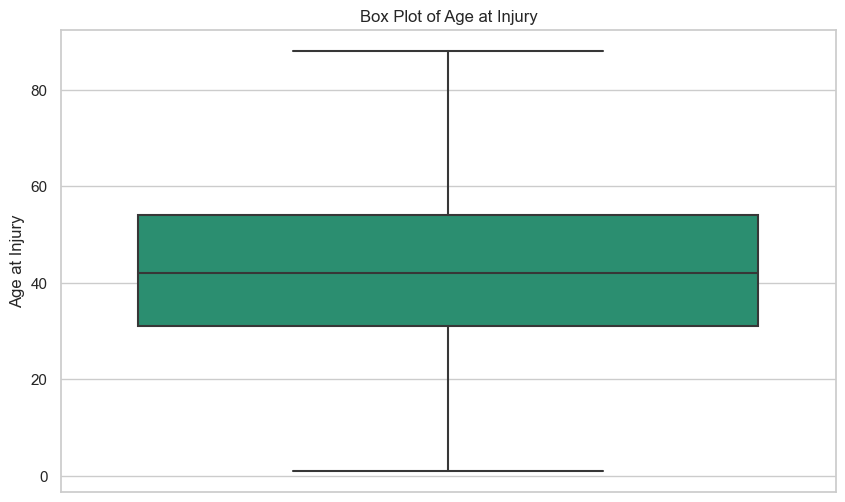

In [83]:
# To see if we still have outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=train, y='Age at Injury', palette='Dark2')
plt.title('Box Plot of Age at Injury')
plt.ylabel('Age at Injury')
plt.show()

### Summary:
- **Outliers**: Replaced with `np.nan` for future KNN imputation.
- **Inconsistencies**: Resolved by filling with `accident year - birth year` when possible, `np.nan` otherwise.
- **Age < 18**: Red-flagged and transformed into `np.nan` for future KNN imputation.


# <a class='anchor' id='3.8'></a>

> ## **Dropping used Columns and Changing DataTypes**

In [84]:
show_missing(train)

,variable,dtype,count,unique,missing,pc_missing
0,Accident Date,datetime64[ns],574026,5539,0,0
1,Age at Injury,float64,574026,85,2476,0
2,Alternative Dispute Resolution,int64,574026,2,0,0
3,Assembly Date,datetime64[ns],574026,897,0,0
4,Attorney/Representative,int32,574026,2,0,0
...,...,...,...,...,...,...
57,C-3 Date_Missing_First Hearing Date_Missing,bool,574026,2,0,0
58,Season,int32,574026,4,0,0
59,Is Weekend,bool,574026,2,0,0
60,Red_Flag_Year,int32,574026,2,0,0


We took all the information we need so now, we drop these columns

In [85]:
train = train.drop('Accident Date', axis = 1) 
train = train.drop('C-2 Date', axis = 1) 
train = train.drop('Assembly Date', axis = 1)
train = train.drop('Assembly To C-3 Days', axis = 1)
train = train.drop('Accident To C-3 Days', axis = 1)
train = train.drop('C-3 Date', axis = 1)
train = train.drop('Birth Year', axis = 1) 
train = train.drop('First Hearing Date', axis = 1)



In [86]:
# Change some variable types

train['Alternative Dispute Resolution'] = train['Alternative Dispute Resolution'].astype('int32', errors='ignore')
train['Is Weekend'] = train['Is Weekend'].astype('int32', errors='ignore')
train['Age at Injury'] = train['Age at Injury'].astype('int64', errors='ignore')
train['Attorney/Representative'] = train['Attorney/Representative'].astype('int32', errors='ignore')
train['COVID-19 Indicator'] = train['COVID-19 Indicator'].astype('int32', errors='ignore')
train['IME-4 Count'] = train['IME-4 Count'].astype('int64', errors='ignore')




In [87]:
show_missing(train)

,variable,dtype,count,unique,missing,pc_missing
0,Age at Injury,float64,574026,85,2476,0
1,Alternative Dispute Resolution,int32,574026,2,0,0
2,Attorney/Representative,int32,574026,2,0,0
3,Average Weekly Wage,float64,574026,120025,28651,5
4,Carrier Name,object,574026,2046,0,0
5,Carrier Type,object,574026,8,0,0
6,Claim Injury Type,int64,574026,8,0,0
7,County of Injury,object,574026,63,0,0
8,COVID-19 Indicator,int32,574026,2,0,0
9,District Name,object,574026,8,0,0


# <a class='anchor' id='3.9'></a>

> ## **Dealing with categorical data**

Using frequency encoder for `Carrier Name`, `District Name` and `County of Injury`.

> ### Carrier Name

In [88]:
train['Carrier Name'].value_counts()

Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64

2046 unique values, we believe that frequency encoder is the best solution.

In [89]:
# frequency encoding insurance providers

frequency_encoding = train['Carrier Name'].value_counts().to_dict()
train['Carrier Name Frequency'] = train['Carrier Name'].map(frequency_encoding)



In [90]:
# Frequency encoded Carrier Name
train['Carrier Name Frequency'].value_counts()

Carrier Name Frequency
111144    111144
21602      21602
17540      17540
17176      17176
14366      14366
           ...  
103          103
98            98
92            92
91            91
75            75
Name: count, Length: 429, dtype: int64

> ### District Name

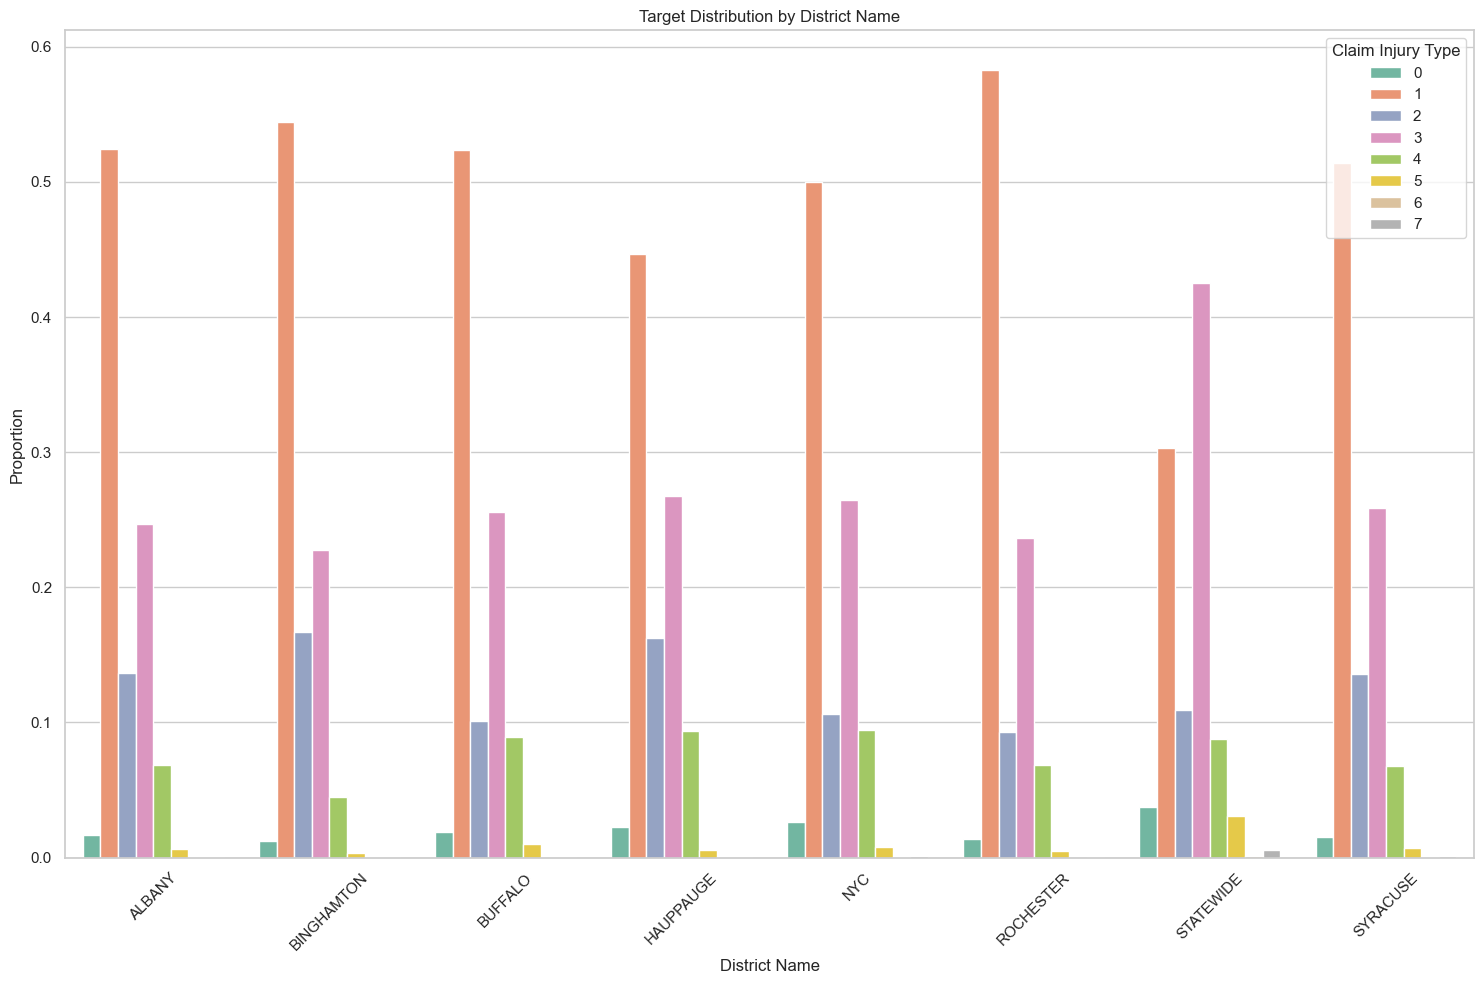

In [91]:
column_of_interest = "District Name"
target = "Claim Injury Type"

# Create a normalized distribution table
distribution = (
    train.groupby(column_of_interest)[target]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Visualize the target distribution for each value of the column
plt.figure(figsize=(15, 10))
sns.barplot(
    data=distribution,
    x=column_of_interest,
    y="proportion",
    hue=target,
    palette="Set2"
)
plt.title(f"Target Distribution by {column_of_interest}")
plt.ylabel("Proportion")
plt.xlabel(column_of_interest)
plt.xticks(rotation=45)
plt.legend(title=target)
plt.tight_layout()
plt.show()

We cannot clearly distinguish differences between the values, except for "Statewide," which has the lowest frequency among all. Therefore, we will not focus on it. Instead, we decided to use frequency encoding, which will better highlight these differences.

In [92]:
train['District Name'].value_counts()

District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

In [93]:
frequency_encoding = train['District Name'].value_counts().to_dict()
train['District Name Frequency'] = train['District Name'].map(frequency_encoding)

In [94]:
train['District Name Frequency'].value_counts()

District Name Frequency
270779    270779
86171      86171
60536      60536
45605      45605
44646      44646
40449      40449
21864      21864
3976        3976
Name: count, dtype: int64

> ### County of Injury

63 unique values, we decided to use frequency encoder

In [95]:
train['County of Injury'].value_counts()

County of Injury
SUFFOLK       60430
QUEENS        58333
KINGS         53207
NASSAU        43580
BRONX         39618
              ...  
WYOMING         760
MONTGOMERY      613
SCHOHARIE       558
YATES           396
HAMILTON        134
Name: count, Length: 63, dtype: int64

In [96]:
frequency_encoding = train['County of Injury'].value_counts().to_dict()
train['County of Injury Frequency'] = train['County of Injury'].map(frequency_encoding)

In [97]:
# Now we drop these variables as we transformed them into frequency
train.drop(columns='Carrier Name', inplace = True)
train.drop(columns='County of Injury', inplace=True)
train.drop(columns='District Name', inplace=True)

> ### Zip Code

We already see strange zip codes here

In [98]:
train['Zip Code'].value_counts()

Zip Code
11236      3302
10940      2971
11717      2807
11434      2759
11706      2728
           ... 
09603         1
13125         1
75038.0       1
14507.0       1
07122         1
Name: count, Length: 10060, dtype: int64

In [99]:
# Red Flag
train['Missing Zip Code'] = train['Zip Code'].isna()

American ZIP codes should be composed by numbers and 5 characters long, so we decided to filter any missing or invalid values. We also attempted to identify Canadian postal codes but were unsuccessful.

In [100]:
# Step 1: Fill missing 'Zip Code' values with an empty string
train['Zip Code'] = train['Zip Code'].fillna('')

# Step 2: Convert 'Zip Code' to string and remove trailing '.0' (common with float representations of zip codes)
train['Zip Code'] = train['Zip Code'].astype(str).str.replace(r'\.0$', '', regex=True)

# Step 3: Create a 'Red_Flag Zip Code' column to flag invalid zip codes
train['Red_Flag Zip Code'] = (
# Condition 1: Not purely numeric, not empty, and not 6 characters long
((~train['Zip Code'].str.match(r'^\d+$')) & (train['Zip Code'] != '') & (train['Zip Code'].str.len() != 6))
|
 # Condition 2: Not 5 characters long and not already flagged
((train['Zip Code'].str.len() != 5) & (train['Zip Code'] != ''))
).astype(int)  # Convert the boolean result into integer (1 for invalid, 0 for valid)

# Step 4: Replace invalid or empty zip codes with 'Unknown'
train['Zip Code'] = np.where(
(train['Red_Flag Zip Code'] == 1) | (train['Zip Code'] == ''),  # If flagged or empty
'Unknown',  # Replace with 'Unknown'
train['Zip Code']  # Otherwise, retain the original value
)

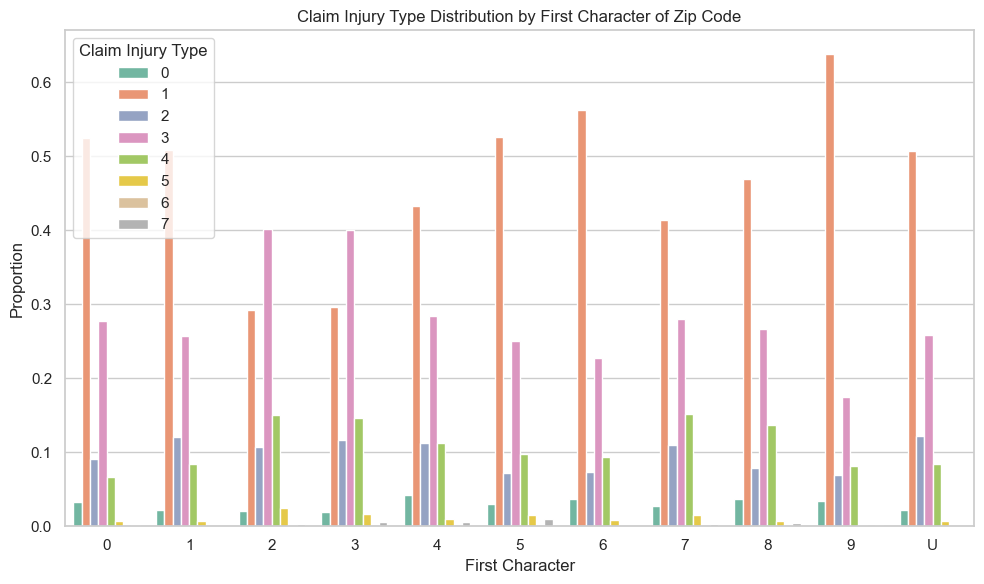

In [101]:

object_column = "Zip Code"

# Extract the first character of the specified object column
train["first_char"] = train[object_column].str[0]

# Create a normalized distribution table
distribution = (
    train.groupby("first_char")["Claim Injury Type"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Visualize the target distribution for each first character
plt.figure(figsize=(10, 6))
sns.barplot(
    data=distribution,
    x="first_char",
    y="proportion",
    hue="Claim Injury Type",
    palette="Set2"
)
plt.title(f"Claim Injury Type Distribution by First Character of {object_column}")
plt.ylabel("Proportion")
plt.xlabel("First Character")
plt.legend(title="Claim Injury Type")
plt.tight_layout()
plt.show()

train = train.drop(columns = "first_char")

We can see diference in zipcodes starting with 2 and 3 so we decided to flag that

### ZIP Codes Beginning With:

- **2**:  
  District of Columbia, Maryland, North Carolina, South Carolina, Virginia, West Virginia

- **3**:  
  Alabama, Florida, Georgia, Mississippi, Tennessee


In [102]:
train['Zip Code (2 & 3)'] = ((train['Zip Code'].str[:1] == '2') | (train['Zip Code'].str[:1] == '3')).astype(int)
train = train.drop(columns = 'Zip Code')

## Get_dummies

Using One Hot encoder for `Carrier Type` and `Medical Fee`.

> ### Carrier Type

In [103]:
# Since there are not a lot of unique values in Carrier type we decided to use another method
# One-hot encode the 'Carrier Type' column
train = pd.get_dummies(train, columns=['Carrier Type'], prefix='Carrier')

In [104]:
# We join all Special Fund in one column 
def join_bool(data, cols, name):
    """
    Creates a new column in the data DataFrame that aggregates the values from a list of specified columns (cols). 
    This will be used for dealing with one-hot encoded columns.
    
    Parameters:
    - data: pd.DataFrame - DataFrame on which the function is applied
    - cols: list - Target columns for joining
    - name: str - Name of a new column
    
    Returns:
    - data: pd.DataFrame - DataFrame with joined column 
    """
    # Initialize the new column with 0s
    data[name] = 0
    
    for col in cols:
        if col in data.columns:
            # Add the values of the existing column to the new column
            data[name] += data[col]
    
    return data
train = join_bool(train,["Carrier_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)",
                           "Carrier_5C. SPECIAL FUND - POI CARRIER WCB MENANDS",
                           "Carrier_5D. SPECIAL FUND - UNKNOWN"],"Carrier_5 SPECIAL FUND")


In [105]:
# Drop this columns as we already joined them
columns_to_drop= [
    'Carrier_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
    'Carrier_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
    'Carrier_5D. SPECIAL FUND - UNKNOWN'
]
train = train.drop(columns=[col for col in columns_to_drop if col in train.columns])


In [106]:
show_missing(train).tail(20)

,variable,dtype,count,unique,missing,pc_missing
41,C-3 Date_Not_Missing_First Hearing Date_Missing,bool,574026,2,0,0
42,First Hearing Date_Not_Missing_C-3 Date_Missing,bool,574026,2,0,0
43,C-3 Date_Not_Missing_First Hearing Date_Not_Mi...,bool,574026,2,0,0
44,C-3 Date_Missing_First Hearing Date_Missing,bool,574026,2,0,0
45,Season,int32,574026,4,0,0
46,Is Weekend,int32,574026,2,0,0
47,Red_Flag_Year,int32,574026,2,0,0
48,Red_Flag_Age at Injury,int32,574026,2,0,0
49,Carrier Name Frequency,int64,574026,429,0,0
50,District Name Frequency,int64,574026,8,0,0


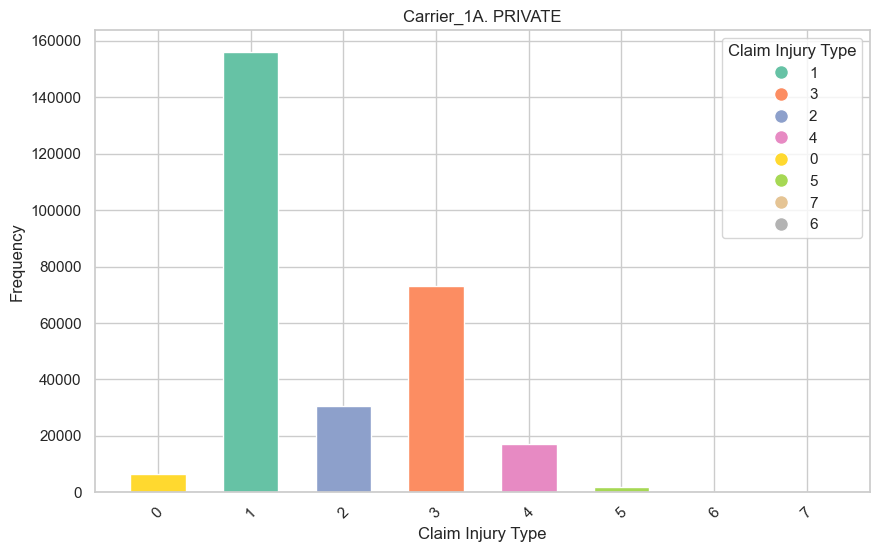

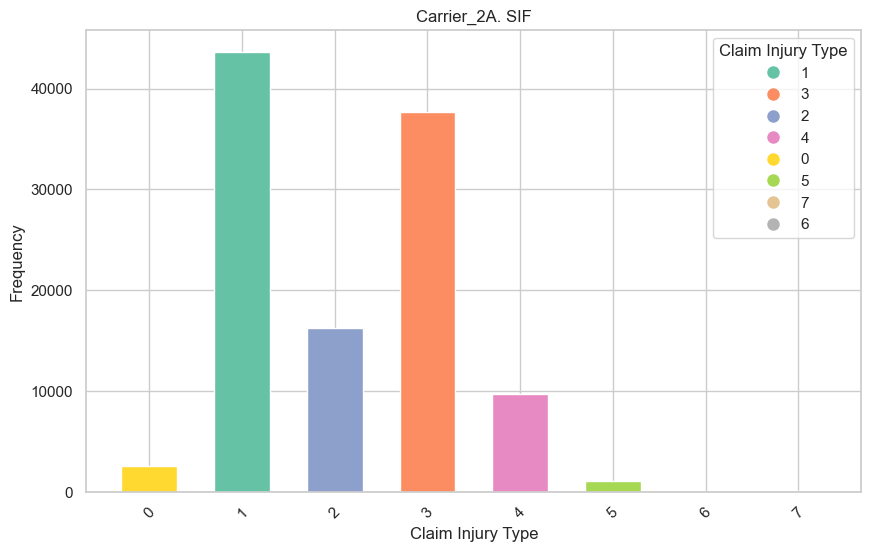

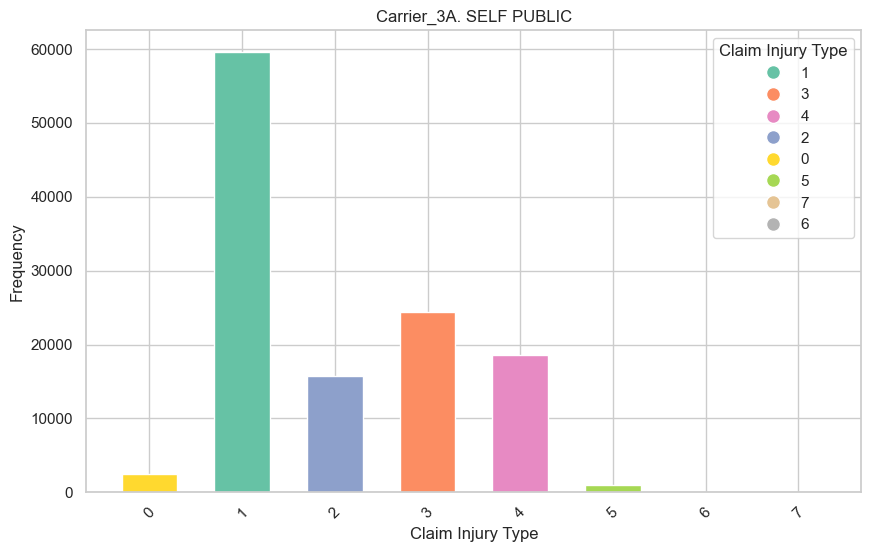

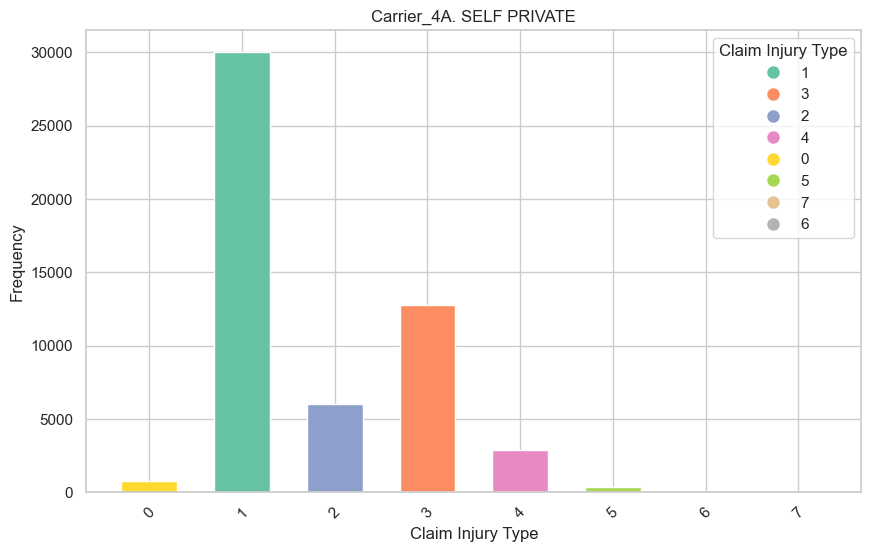

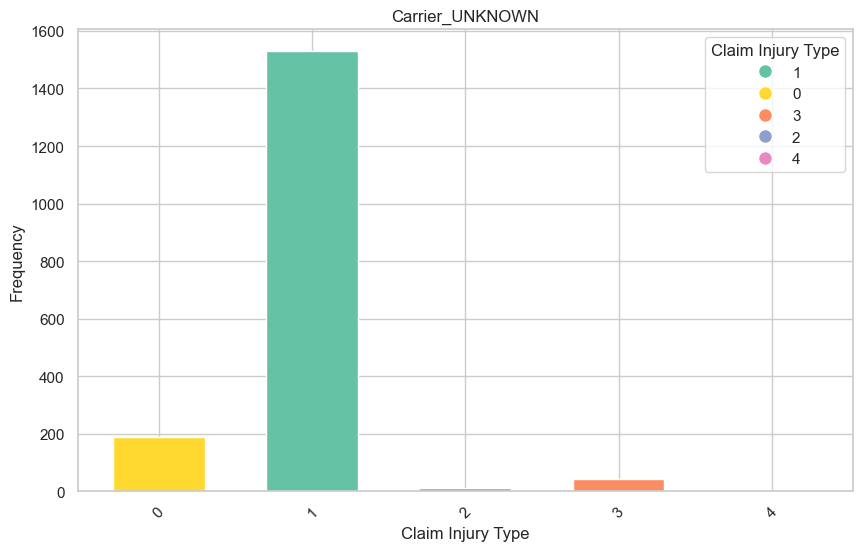

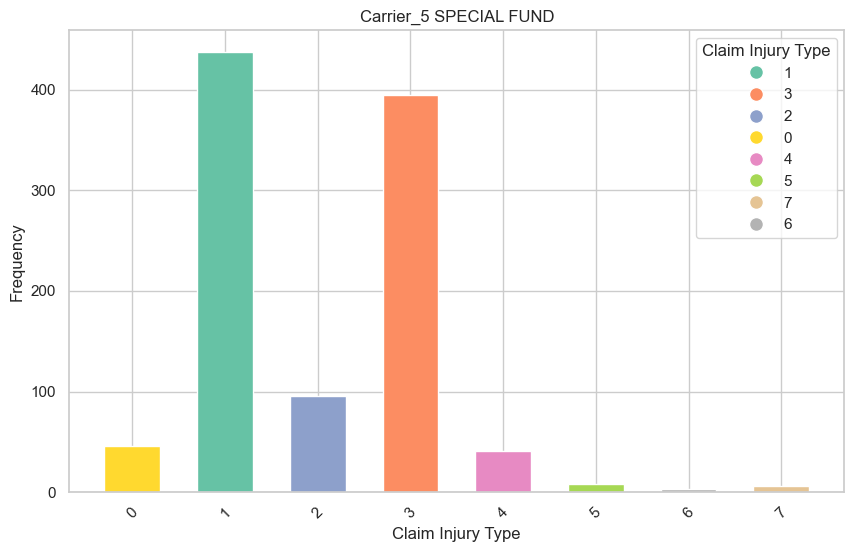

In [107]:
# List of boolean columns
boolean_columns = ['Carrier_1A. PRIVATE', 'Carrier_2A. SIF', 'Carrier_3A. SELF PUBLIC', 
                   'Carrier_4A. SELF PRIVATE', 'Carrier_UNKNOWN', 'Carrier_5 SPECIAL FUND']

# Create a consistent color map for 'Claim Injury Type'
unique_claim_types = pd.concat([train[train[col] == True]['Claim Injury Type'] for col in boolean_columns]).unique()
color_palette = sns.color_palette("Set2", len(unique_claim_types))
color_map = dict(zip(unique_claim_types, color_palette))

# Loop through each boolean column in the list
for carrier in boolean_columns:
    # Filter data based on the current carrier column being True
    filtered_data = train[train[carrier] == True]
    
    # Get value counts for 'Claim Injury Type' in the filtered data
    counts = filtered_data['Claim Injury Type'].value_counts()
    
    # Create a custom bar plot using matplotlib
    plt.figure(figsize=(10, 6))
    
    # Get the colors for the bars from the color_map
    bars = plt.bar(counts.index, counts.values, width=0.6, color=[color_map[val] for val in counts.index])
    
    # Customize the plot
    plt.title(f'{carrier}')  # Title with the carrier name
    plt.xlabel('Claim Injury Type')
    plt.ylabel('Frequency')

    # Remove x-axis labels
    plt.xticks(rotation=45)

    # Add legend manually: create handles for each color (bar) in the plot
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[val], markersize=10) 
               for val in counts.index]
    labels = counts.index.tolist()  # Convert Index to a list for the legend labels

    # Display the legend with the proper labels
    plt.legend(handles=handles, labels=labels, title='Claim Injury Type', loc='upper right')

    # Show the plot
    plt.show()

There are some differences between them, but we can't discuss 'Unknown' and 'Special Fund' due to their low presence. The percentage of temporary injuries is definitely higher in Carrier 2A SIF.

> ### Medical Fee Region

In [108]:
one_hot_encoded = pd.get_dummies(train['Medical Fee Region'], prefix='Region')

# Optionally, concatenate with the original DataFrame
train = pd.concat([train, one_hot_encoded], axis=1)
     
train = train.drop(columns=['Medical Fee Region','Region_UK'])


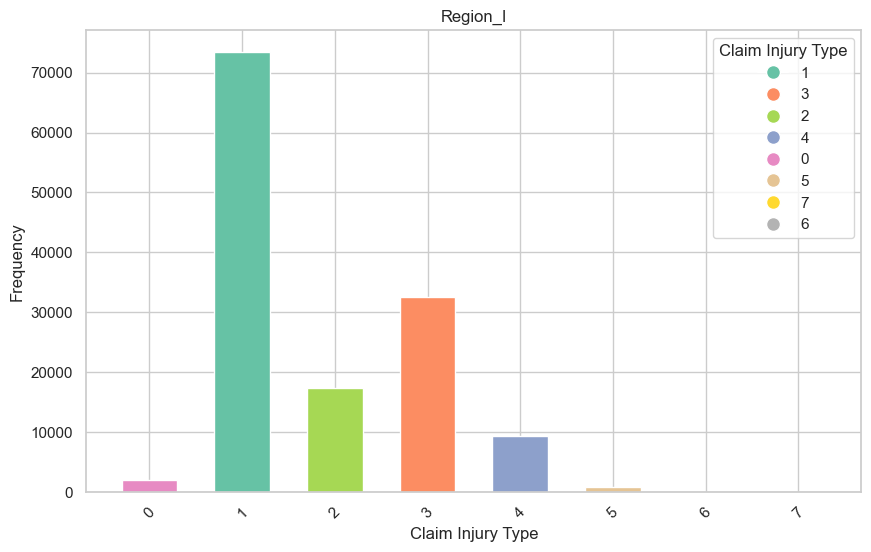

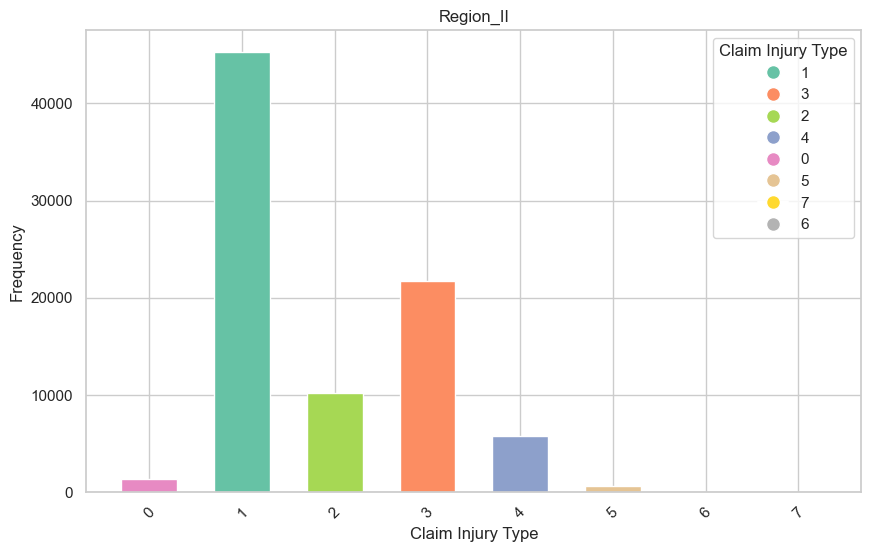

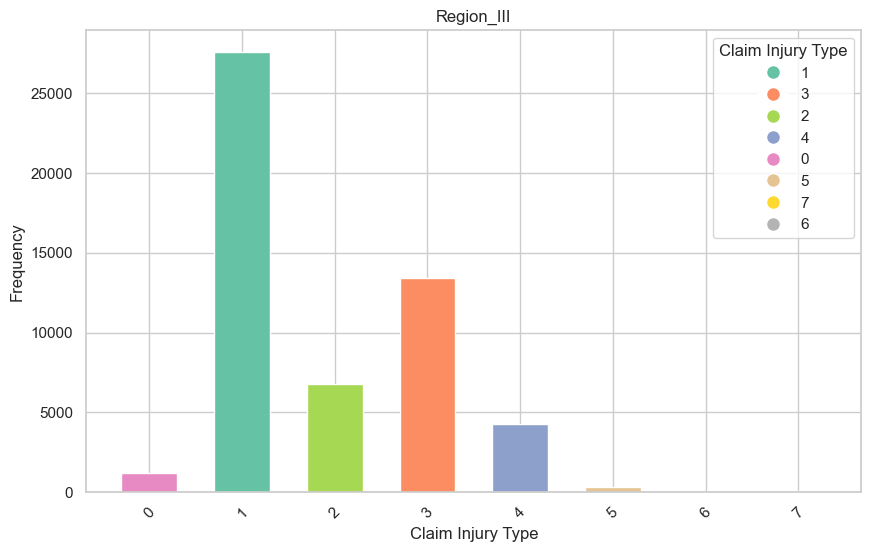

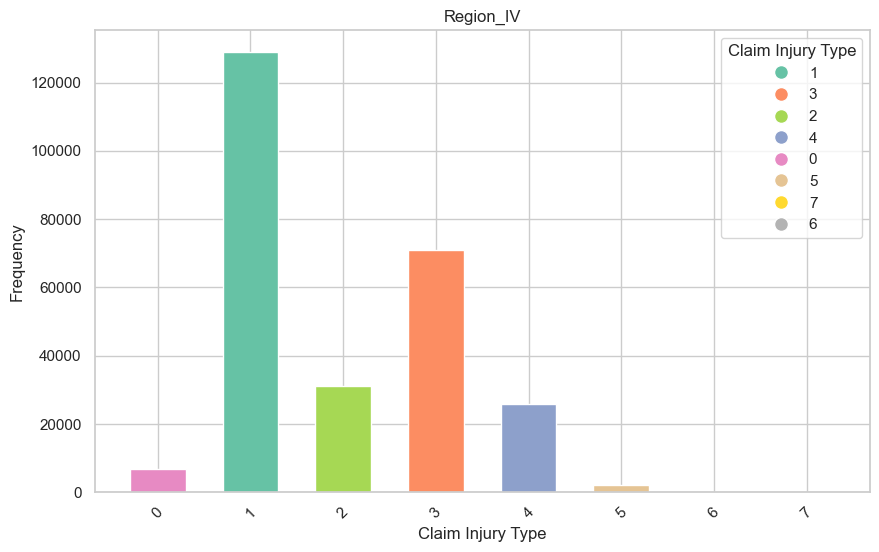

In [109]:
# List of boolean columns
boolean_columns = ['Region_I','Region_II','Region_III','Region_IV']

# Create a consistent color map for 'Claim Injury Type'
unique_claim_types = pd.concat([train[train[col] == True]['Claim Injury Type'] for col in boolean_columns]).unique()
color_palette = sns.color_palette("Set2", len(unique_claim_types))
color_map = dict(zip(unique_claim_types, color_palette))

# Loop through each boolean column in the list
for carrier in boolean_columns:
    # Filter data based on the current carrier column being True
    filtered_data = train[train[carrier] == True]
    
    # Get value counts for 'Claim Injury Type' in the filtered data
    counts = filtered_data['Claim Injury Type'].value_counts()
    
    # Create a custom bar plot using matplotlib
    plt.figure(figsize=(10, 6))
    
    # Get the colors for the bars from the color_map
    bars = plt.bar(counts.index, counts.values, width=0.6, color=[color_map[val] for val in counts.index])
    
    # Customize the plot
    plt.title(f'{carrier}')  # Title with the carrier name
    plt.xlabel('Claim Injury Type')
    plt.ylabel('Frequency')

    # Remove x-axis labels
    plt.xticks(rotation=45)

    # Add legend manually: create handles for each color (bar) in the plot
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[val], markersize=10) 
               for val in counts.index]
    labels = counts.index.tolist()  # Convert Index to a list for the legend labels

    # Display the legend with the proper labels
    plt.legend(handles=handles, labels=labels, title='Claim Injury Type', loc='upper right')

    # Show the plot
    plt.show()

The only difference is in frequency

# <a class='anchor' id='3.10'></a>

> ## **Dealing with Industry Code**

In [110]:
train['Industry Code Description'].value_counts()

Industry Code Description
HEALTH CARE AND SOCIAL ASSISTANCE                               114339
PUBLIC ADMINISTRATION                                            92240
RETAIL TRADE                                                     61638
TRANSPORTATION AND WAREHOUSING                                   54023
EDUCATIONAL SERVICES                                             44393
MANUFACTURING                                                    38150
CONSTRUCTION                                                     30903
ACCOMMODATION AND FOOD SERVICES                                  26456
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     21027
WHOLESALE TRADE                                                  15236
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    13149
ARTS, ENTERTAINMENT, AND RECREATION                               9967
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES                  9770
INFORMATION                                        

Since our Industry code is categorical we decided to tranform it into average yearly salary in New York. <br>
Data is taken from different internet sources

In [111]:
salaries_ny = {
    'RETAIL TRADE': 45000,
    'CONSTRUCTION': 70000,
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT': 50000,
    'HEALTH CARE AND SOCIAL ASSISTANCE': 60000,
    'ACCOMMODATION AND FOOD SERVICES': 35000,
    'EDUCATIONAL SERVICES': 65000,
    'INFORMATION': 91660,
    'MANUFACTURING': 76000,
    'TRANSPORTATION AND WAREHOUSING': 55000,
    'WHOLESALE TRADE': 60000,
    'REAL ESTATE AND RENTAL AND LEASING': 55000,
    'FINANCE AND INSURANCE': 120000,
    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 40000,
    'PUBLIC ADMINISTRATION': 65000,
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 97700,
    'ARTS, ENTERTAINMENT, AND RECREATION': 40000,
    'UTILITIES': 80000,
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 30000,
    'MINING': 70000,
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 100000
}

train['Industry Code Avg_Salary'] = train['Industry Code Description'].map(salaries_ny)

In [112]:
train['Industry Code Avg_Salary'].value_counts()

Industry Code Avg_Salary
65000.0     136633
60000.0     129575
55000.0      62971
45000.0      61638
76000.0      38150
70000.0      31598
35000.0      26456
40000.0      23116
50000.0      21027
97700.0       9770
91660.0       9166
120000.0      8214
80000.0       2980
30000.0       2404
100000.0       370
Name: count, dtype: int64

 Here we decided to join values into categories and than create boolean columns. 

In [113]:
industry_injury_map = {
    'RETAIL TRADE': 'Customer-Facing Services',
    'CONSTRUCTION': 'Physical Labor & High Risk',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT': 'Office-Based Professions',
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'Public Interaction & Environmental Risk',
    'ACCOMMODATION AND FOOD SERVICES': 'Customer-Facing Services',
    'EDUCATIONAL SERVICES': 'Public Interaction & Environmental Risk',
    'INFORMATION': 'Creative & Low Risk',
    'MANUFACTURING': 'Physical Labor & High Risk',
    'TRANSPORTATION AND WAREHOUSING': 'Physical Labor & High Risk',
    'WHOLESALE TRADE': 'Customer-Facing Services',
    'REAL ESTATE AND RENTAL AND LEASING': 'Customer-Facing Services',
    'FINANCE AND INSURANCE': 'Office-Based Professions',
    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Miscellaneous/Other Services',
    'PUBLIC ADMINISTRATION': 'Public Interaction & Environmental Risk',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Office-Based Professions',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Creative & Low Risk',
    'UTILITIES': 'Physical Labor & High Risk',
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 'Physical Labor & High Risk',
    'MINING': 'Physical Labor & High Risk',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Office-Based Professions'
}

# Temporary column that we are going to one-hot encode 
train['Injury Category'] = train['Industry Code Description'].map(industry_injury_map)

# Fill Missing values as Unknown. Like this we deal with nans in Industry code
train['Injury Category'].fillna('Unknown', inplace=True)


In [114]:
# One-hot encoder for Injury Category

train_one_hot = pd.get_dummies(train['Injury Category'], prefix='Injury_Category')

# Concatenate the one-hot encoded columns back to the original DataFrame
train = pd.concat([train, train_one_hot], axis=1)

# Display the resulting DataFrame
train.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Claim Injury Type,COVID-19 Indicator,Gender,IME-4 Count,Industry Code,Industry Code Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Agreement Reached,Number of Dependents,Missing IME-4 Count,Missing Accident,Missing C-2,Missing C-3,Missing First Hearing,Year,Greenflag Dates,C-2 To Assembly Days,Accident To C-2 Days,Accident To Assembly Days,Follow_The_C2_Rules,Follow_The_C3_Rules,RedFlag_Assembly_to_C-3,RedFlag_Accident_to_C-3,Red_Flag_Accident_To_C-2,Red_Flag_C-2_To_Assembly,Accident Date - Assembly Date - C-2 Date,Accident Date - C-2 Date - Assembly Date,Assembly Date - Accident Date - C-2 Date,Assembly Date - C-2 Date - Accident Date,C-2 Date - Accident Date - Assembly Date,C-2 Date - Assembly Date - Accident Date,C-3 Date_Not_Missing_First Hearing Date_Missing,First Hearing Date_Not_Missing_C-3 Date_Missing,C-3 Date_Not_Missing_First Hearing Date_Not_Missing,C-3 Date_Missing_First Hearing Date_Missing,Season,Is Weekend,Red_Flag_Year,Red_Flag_Age at Injury,Carrier Name Frequency,District Name Frequency,County of Injury Frequency,Missing Zip Code,Red_Flag Zip Code,Zip Code (2 & 3),Carrier_1A. PRIVATE,Carrier_2A. SIF,Carrier_3A. SELF PUBLIC,Carrier_4A. SELF PRIVATE,Carrier_UNKNOWN,Carrier_5 SPECIAL FUND,Region_I,Region_II,Region_III,Region_IV,Industry Code Avg_Salary,Injury Category,Injury_Category_Creative & Low Risk,Injury_Category_Customer-Facing Services,Injury_Category_Miscellaneous/Other Services,Injury_Category_Office-Based Professions,Injury_Category_Physical Labor & High Risk,Injury_Category_Public Interaction & Environmental Risk,Injury_Category_Unknown
0,31.0,0,0,0.00,1,0,1,0,44.0,RETAIL TRADE,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,0.0,1.0,1,0,0,1,1,2019,0,1,1,2,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,True,1,0,0,0,12736,44646,3355,False,0,0,True,False,False,False,False,0,True,False,False,False,45000.0,Customer-Facing Services,False,True,False,False,False,False,False
1,46.0,0,1,1745.93,3,0,0,4,23.0,CONSTRUCTION,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),1.0,4.0,0,0,0,0,0,2019,1,0,124,124,0,1,0,0,0,0,True,True,False,False,False,False,False,False,True,False,3,0,0,0,2862,40449,760,False,0,0,True,False,False,False,False,0,True,False,False,False,70000.0,Physical Labor & High Risk,False,False,False,False,True,False,False
2,40.0,0,0,1434.80,3,0,1,0,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,0.0,6.0,1,0,0,1,1,2019,0,0,26,26,0,0,0,0,0,0,True,True,False,False,False,False,False,False,False,True,1,0,0,0,9126,86171,17450,False,0,0,True,False,False,False,False,0,False,True,False,False,50000.0,Office-Based Professions,False,False,False,True,False,False,False
4,61.0,0,0,NaN,1,0,1,0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),0.0,1.0,1,0,0,1,1,2019,0,1,1,2,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,True,1,0,0,0,111144,86171,11530,False,0,0,False,True,False,False,False,0,False,True,False,False,60000.0,Public Interaction & Environmental Risk,False,False,False,False,False,True,False
5,67.0,0,0,0.00,2,0,1,0,44.0,RETAIL TRADE,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),0.0,5.0,1,0,0,1,1,2019,0,1,5,6,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,True,1,0,0,0,14366,60536,60430,False,0,0,True,False,False,False,False,0,False,False,False,True,45000.0,Customer-Facing Services,False,True,False,False,False,False,False


In [115]:
# We did everything that we wanted to do so now we drop these columns
train.drop(columns=['Injury Category'], inplace = True)

# <a class='anchor' id='3.11'></a>

> ## **Target Encoding for WCIO and Industry descriptions**

Here we used the same process for all `WCIO` Features, we drop the code and work with description since we find it more easy to understand and analyse than the code. Also, there are codes, like observed in **Part 1** that repeated for the same description, therefore its a way to not change original data.

In [116]:
def process_wcio_and_industry_features(data_train, cols, y_train):
    """
    Automates the processing of WCIOs And Industry Code Descroptions, including normalized counts, 
    filling missing values, and applying the normalized values to the training and testing datasets.

    Parameters:
    - data_train: pd.DataFrame - Training DataFrame.
    - cols: list - List of WCIO and Industry columns to process.
    - y_train: pd.Series - Series containing the target values for the training set.


    Returns:
    - data_train - Processed DataFrame.
    """
    # Define the name of the target
    target = y_train.name

    # Temporary add target to data_train for processing
    data_train_temp = data_train.copy()
    data_train_temp[target] = y_train

    # Iterate through WCIO and Industry columns
    for col in cols:
        # Fill missing values with 'Unknown'
        data_train_temp[col] = data_train_temp[col].fillna('Unknown')
        data_train[col] = data_train[col].fillna('Unknown')


        # Grouping and calculating normalized counts
        grouped = data_train_temp.groupby([col, target]).size()
        normalized_counts = grouped / grouped.groupby(level=0).sum()
        result_df = normalized_counts.unstack(fill_value=0).reset_index()

        # Rename Columns
        result_df.columns = [result_df.columns[0]] + [f"{col}_{str(val)}" for val in result_df.columns[1:]]

        # Merge dos normalized results with original DataFrames
        data_train = pd.merge(data_train, result_df, on=col, how='left')

    return data_train

In [117]:
train = process_wcio_and_industry_features(train,['WCIO Cause of Injury Description',
                                                  'WCIO Nature of Injury Description',
                                                  'WCIO Part Of Body Description',
                                                  'Industry Code Description'],
                                                   train['Claim Injury Type'])

train = train.drop(columns = ['WCIO Cause of Injury Description',
                              'WCIO Nature of Injury Description',
                              'WCIO Part Of Body Description',
                              'Industry Code Description',
                              'WCIO Cause of Injury Code',
                              'WCIO Nature of Injury Code',
                              'WCIO Part Of Body Code',
                              'Industry Code'])

# <a class='anchor' id='#3.12'></a>

> ## **Dealing with Missing values using KNNImputer**

Text(0.5, 1.0, 'Spearman Correlation Heatmap')

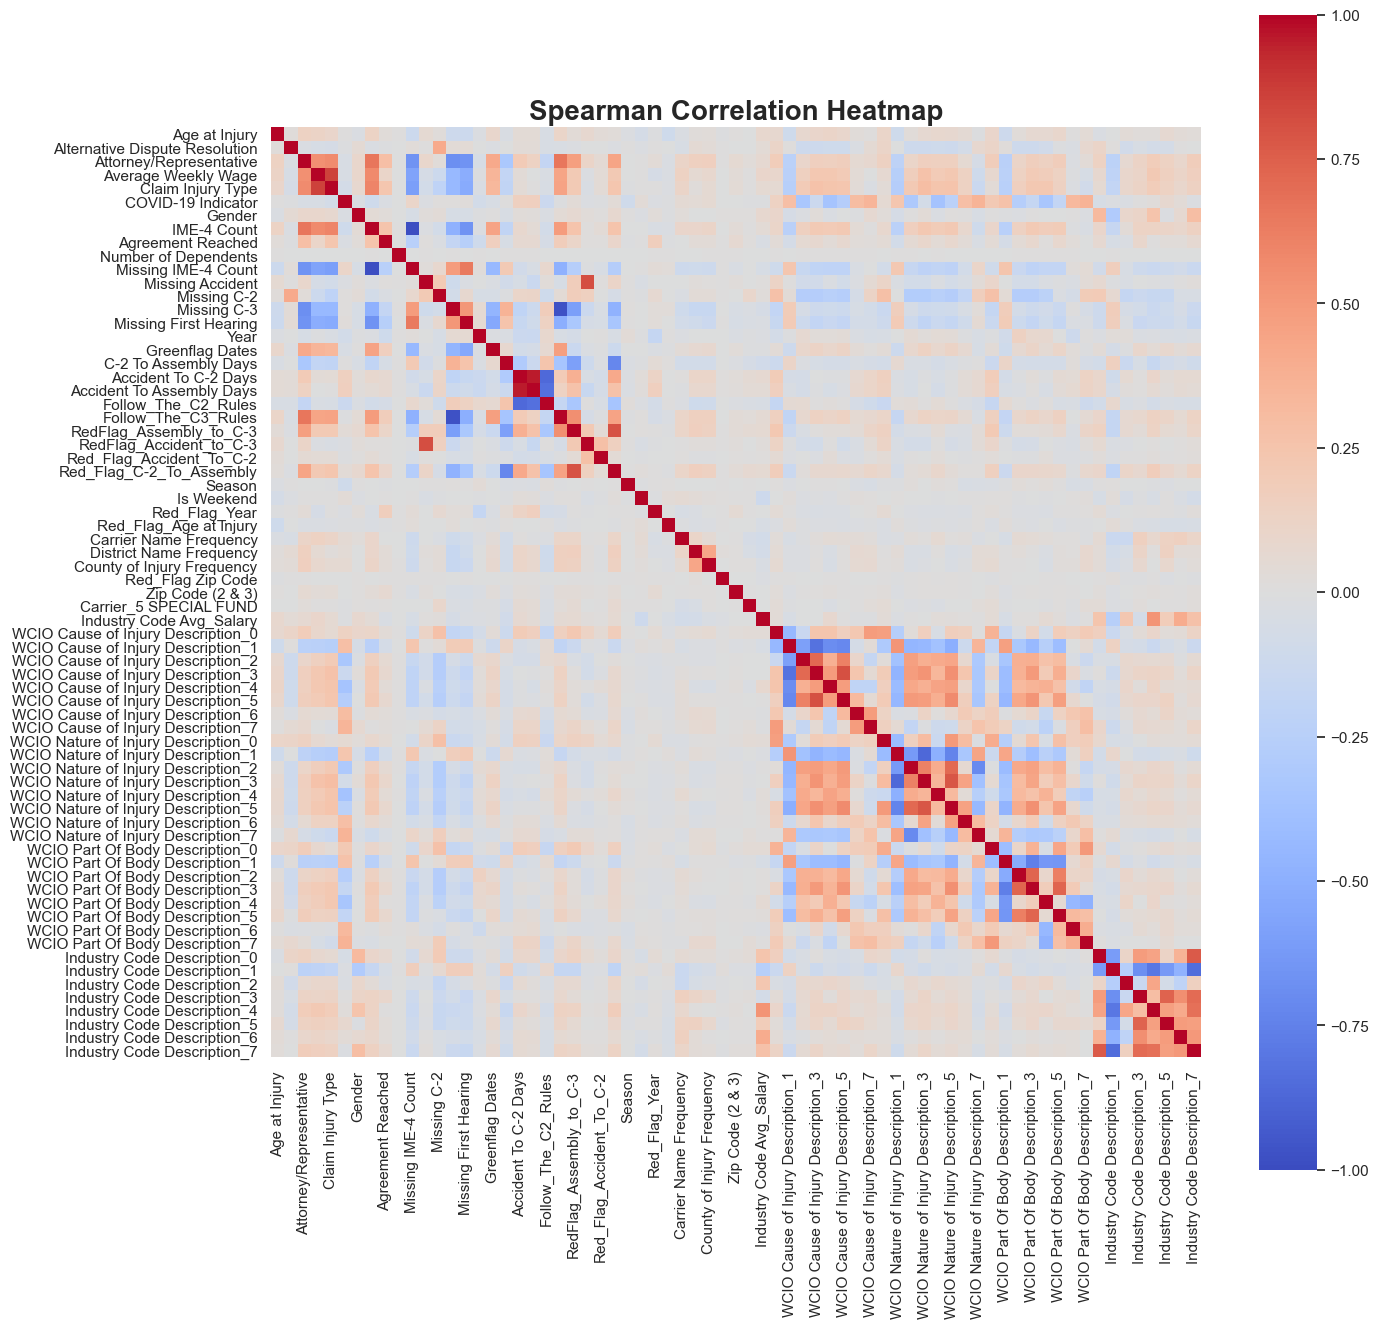

In [118]:
#Set up the matplotlib figure
plt.figure(figsize=(15, 15))

#Draw the heatmap with the mask
sns.heatmap(train.select_dtypes(include=[np.number]).corr(method='spearman'), 
            annot=False, 
            cmap='coolwarm', 
            square=True, 
            vmin=-1, 
            vmax=1)

#Title and show the plot
plt.title('Spearman Correlation Heatmap', fontweight='bold', fontsize=20)


> ### KNN

In [119]:
def get_corr(data, target_col, n_corr=5):
    """
    Identifies the columns in a dataset (data) that have the strongest correlations
    with a specified target column (target_col). It selects a specified number (n_corr) of the most correlated columns,
    prioritizing boolean-like columns, while excluding columns with missing values and IME-4 Count excluded columns.
    IME-4 Count is excluded due to empirical research. Missing IME-4 Count is more prefered and they have high correlation.
    
    Parameters:
    - data: pd.DataFrame - DataFrame on which the function is applied
    - target_col: str - Target column name
    - n_corr: int - Number of columns with highest correlation (default = 5)
    
    Returns:
    - selected_columns: list - List of highest correlation columns
    
    """
    
    correlations = data.corr()[target_col].abs().sort_values(ascending=False)
    
    # Exclude the target column itself and the IME-4 Count
    top_columns = correlations.index[1:] # Start from 1 to exclude the target column
    exclude_cols = [col for col in data.columns if data[col].isnull().any()] + ['IME-4 Count'] + ['Claim Identifier']
    top_columns = [col for col in top_columns if col not in exclude_cols]
    
    # Identify boolean-like columns (int with only values 0 and 1)
    boolean_columns = [col for col in top_columns if data[col].nunique() == 2 and sorted(data[col].unique()) == [0, 1]]
    non_boolean_columns = [col for col in top_columns if col not in boolean_columns]
    
    # Take up to 2 boolean columns
    selected_boolean_columns = boolean_columns[:2]
    
    # Take the remaining columns from non-boolean ones to complete n_corr
    remaining_count = n_corr - len(selected_boolean_columns)
    selected_non_boolean_columns = non_boolean_columns[:remaining_count]
    
    # Combine the selections
    selected_columns = selected_boolean_columns + selected_non_boolean_columns
    
    print(f"Our '{target_col}' has the highest correlation with {selected_columns}.")
    
    return selected_columns

In [120]:
def knn_features(data):
    """
    Combines a lists of features from get_corr function for every column with missing values
    in order to give to knn function a list of unique features without repetitions.
    
    Parameters:
    - data: pd.DataFrame - DataFrame on which the function is applied.
    
    Returns:
    - features_for_knn: list - List of features with highest correlations without repetitions 
    
    """
    columns_with_nan = [col for col in data.columns if data[col].isnull().any()]

    features_for_knn = []
    
    for col in columns_with_nan:
        features_for_knn.append(get_corr(data, col))

    features_for_knn = list(set(item for sublist in features_for_knn for item in sublist))

    return features_for_knn

In [121]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
def knn(data_train, target_cols, features, n_neighbors=5):
    """
    Imputes missing values using KNN, applying Min-Max Scaling beforehand and reversing the scaling afterward, 
    ensuring no data leakage in the test set. The imputation is done only for data_train.

    Parameters:
    - data_train: pd.DataFrame - DataFrame containing the training data.
    - target_cols: list - Target columns for imputation.
    - features: list - Feature columns to use for KNN.
    - n_neighbors: int - Number of neighbors for KNN. Default is 5.

    Returns:
    - data_train: updated dataframe with imputed values.
    """
    # Identify indexes of missing and non-missing values in train dataset
    missing_indices_train = data_train.loc[data_train[target_cols].isnull().any(axis=1)].index
    not_missing_indices_train = data_train.loc[data_train[target_cols].notnull().all(axis=1)].index

    # Sample 15% observations without missing values
    sampled_indices_train = np.random.choice(
        not_missing_indices_train, 
        size=max(1, int(0.15 * len(not_missing_indices_train))), 
        replace=False
    )

    # Combine our sample with missing rows
    combined_indices_train = np.concatenate([missing_indices_train, sampled_indices_train])

    # Train subset for knn
    subset_train = data_train.loc[combined_indices_train, target_cols + features]

    # Here we fit_transform MinMaxScaler for train
    scaler = MinMaxScaler()
    scaled_subset_train = pd.DataFrame(
        scaler.fit_transform(subset_train),
        columns=target_cols + features,
        index=combined_indices_train
    )

    # Prepare KNNImputer and fit just for train 
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    knn_imputer.fit(scaled_subset_train)

    # Transform for train
    imputed_train = knn_imputer.transform(scaled_subset_train)

    # Unscaling train data
    imputed_data_unscaled_train = pd.DataFrame(
        scaler.inverse_transform(imputed_train),
        columns=target_cols + features,
        index=combined_indices_train
    )

    # Replace values imputed in data_train 
    data_train.loc[missing_indices_train, target_cols] = imputed_data_unscaled_train.loc[missing_indices_train, target_cols]

    # Final adjustments (rounding Age and Industry Code Avg_Salary)
    data_train['Age at Injury'] = data_train['Age at Injury'].round()
    data_train['Industry Code Avg_Salary'] = data_train['Industry Code Avg_Salary'].round()

    return data_train

In [122]:
pd.set_option('display.max_rows', 110)

In [123]:
show_missing(train)

,variable,dtype,count,unique,missing,pc_missing
0,Age at Injury,float64,574026,85,2476,0
1,Alternative Dispute Resolution,int32,574026,2,0,0
2,Attorney/Representative,int32,574026,2,0,0
3,Average Weekly Wage,float64,574026,120025,28651,5
4,Claim Injury Type,int64,574026,8,0,0
5,COVID-19 Indicator,int32,574026,2,0,0
6,Gender,int64,574026,2,0,0
7,IME-4 Count,int64,574026,42,0,0
8,Agreement Reached,float64,574026,2,0,0
9,Number of Dependents,float64,574026,7,0,0


In [124]:
train = knn(train, [col for col in train.columns if train[col].isnull().any()], knn_features(train))

Our 'Age at Injury' has the highest correlation with ['Attorney/Representative', 'C-3 Date_Missing_First Hearing Date_Missing', 'WCIO Cause of Injury Description_1', 'WCIO Nature of Injury Description_4', 'WCIO Nature of Injury Description_1'].
Our 'Average Weekly Wage' has the highest correlation with ['Attorney/Representative', 'Missing IME-4 Count', 'Claim Injury Type', 'Industry Code Description_1', 'Industry Code Description_4'].
Our 'Industry Code Avg_Salary' has the highest correlation with ['Injury_Category_Customer-Facing Services', 'Injury_Category_Office-Based Professions', 'Industry Code Description_6', 'Industry Code Description_0', 'Industry Code Description_4'].


In [125]:
show_missing(train)

,variable,dtype,count,unique,missing,pc_missing
0,Age at Injury,float64,574026,84,0,0
1,Alternative Dispute Resolution,int32,574026,2,0,0
2,Attorney/Representative,int32,574026,2,0,0
3,Average Weekly Wage,float64,574026,130317,0,0
4,Claim Injury Type,int64,574026,8,0,0
5,COVID-19 Indicator,int32,574026,2,0,0
6,Gender,int64,574026,2,0,0
7,IME-4 Count,int64,574026,42,0,0
8,Agreement Reached,float64,574026,2,0,0
9,Number of Dependents,float64,574026,7,0,0


In [126]:
train['Age at Injury'].value_counts()

Age at Injury
31.0    14084
30.0    14058
32.0    14044
29.0    13704
33.0    13607
51.0    13594
54.0    13521
55.0    13483
34.0    13425
53.0    13424
52.0    13206
50.0    13183
56.0    13110
28.0    13073
37.0    13033
35.0    12971
57.0    12956
49.0    12789
36.0    12751
27.0    12708
58.0    12606
38.0    12401
39.0    12313
41.0    12247
26.0    12240
40.0    12059
42.0    12026
48.0    11795
59.0    11770
47.0    11673
43.0    11622
25.0    11576
44.0    11544
46.0    11448
45.0    11428
60.0    11295
24.0    10845
23.0    10665
61.0    10635
22.0     9503
62.0     8957
21.0     8361
63.0     7599
20.0     7428
64.0     6489
19.0     5960
65.0     5206
66.0     3956
18.0     3575
67.0     3133
68.0     2437
69.0     2000
70.0     1639
17.0     1323
71.0     1277
72.0     1048
73.0      880
74.0      762
16.0      579
75.0      562
76.0      462
77.0      367
78.0      316
79.0      261
80.0      218
81.0      174
15.0      126
82.0      115
83.0       93
84.0       71
85.0  

# <a class='anchor' id='3.13'></a>

> ## **Dealing With Average Weekly Wage**

We had nans before in `Average Weekly Wage` and we decided to create `Wage Indicator` and `is_employeed` after filling it. <br>
If a person gains more than average (New York 2023 value).

In [127]:
train['Wage Indicator'] = (train['Average Weekly Wage'] >= 1757.19).astype(int) 

# boolean variables if person has income or not
train['is_employeed'] = train['Average Weekly Wage'].apply(lambda x: 1 if x > 0 else 0)


In [128]:
# Here we transform all outliers into the value of the top whisker (counting only values higher that 0)
Q1 = train[train['Average Weekly Wage'] > 0]['Average Weekly Wage'].quantile(0.25)
Q3 = train[train['Average Weekly Wage'] > 0]['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [129]:
# Before that we decided to create red flag column.
train['Red_Flag_Average Weekly Wage'] = (train['Average Weekly Wage'] > upper_limit).astype(int)


In [130]:
train['Average Weekly Wage'] = np.where(
    (train['Average Weekly Wage'] > upper_limit) & (train['Average Weekly Wage'] > 0), 
    upper_limit, 
    train['Average Weekly Wage']
)

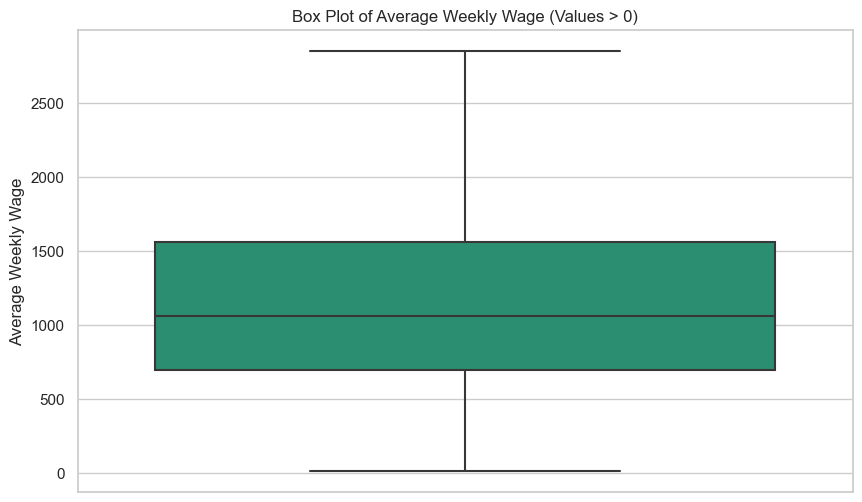

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train[train['Average Weekly Wage'] > 0], y='Average Weekly Wage', palette='Dark2')
plt.title('Box Plot of Average Weekly Wage (Values > 0)')
plt.ylabel('Average Weekly Wage')
plt.show()

In [132]:
show_missing(train)

,variable,dtype,count,unique,missing,pc_missing
0,Age at Injury,float64,574026,84,0,0
1,Alternative Dispute Resolution,int32,574026,2,0,0
2,Attorney/Representative,int32,574026,2,0,0
3,Average Weekly Wage,float64,574026,124186,0,0
4,Claim Injury Type,int64,574026,8,0,0
5,COVID-19 Indicator,int32,574026,2,0,0
6,Gender,int64,574026,2,0,0
7,IME-4 Count,int64,574026,42,0,0
8,Agreement Reached,float64,574026,2,0,0
9,Number of Dependents,float64,574026,7,0,0
